### Update Tensorflow Version to 1.6.0

In [1]:
!pip install https://anaconda.org/intel/tensorflow/1.6.0/download/tensorflow-1.6.0-cp36-cp36m-linux_x86_64.whl --user 

    100% |████████████████████████████████| 84.7MB 18kB/s eta 0:00:011
    100% |████████████████████████████████| 7.1MB 118kB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 286kB/s ta 0:00:01
    100% |████████████████████████████████| 3.1MB 210kB/s ta 0:00:01
    100% |████████████████████████████████| 9.1MB 116kB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 360kB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 199kB/s ta 0:00:01
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /home/u16553/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/u16553/.cache/pip/wheels/a0/f8/e9/1933dbb3447ea6ef57062fd5461cb118deb8c2ed074e8344bf
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /home/u16553/.cache/pip/wheels/9a/1f/0e/3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
  Running setup.py 

# Part 1: Data Wrangling with Breeds on CPU

# Objective

Understand ways to find a data set and to prepare a data set for machine learning and training.

## Activities 
**In this section of the training you will**
- Transfer a data set from the shared location on the server to your current directory. 
- View your initial data
- Clean and normalize the data set
- Organize the data into training and testing groups 


# Find a Data set

### Research Existing Data Sets

Artificial intelligence projects depend upon data. When beginning a project, data scientists look for existing data sets that are similar to or match the given problem. This saves time and money, and leverages the work of others, building upon the body of knowledge for all future projects. 

Typically you begin with a search engine query. For this project, we were looking for a data set with an unencumbered license.  

This project starts with the Oxford IIIT Pet Data set http://www.robots.ox.ac.uk/~vgg/data/pets/ , a 37-category pet data set with roughly 200 images for each class. The images have a large variations in scale, pose, and lighting. All images have an associated ground truth annotation of breed, head region of interest (ROI), and pixel-level trimap segmentation.


### Background
"The pet images were downloaded from Catster* and Dogster*, two social web sites dedicated to the collection and discussion of images of pets, from Flickr* groups, and from Google Images*. People uploading images to Catster and Dogster provide the breed information as well, and the Flickr groups are specific to each breed, which simplifies tagging. For each of the 37 breeds, about 2,000 – 2,500 images were downloaded from these data sources to form a pool of candidates for inclusion in the dataset. From this candidate list, images were dropped if any of the following conditions applied, as judged by the annotators: (i) the image was gray scale, (ii) another image portraying the same animal existed (which happens frequently in Flickr), (iii) the illumination was poor, (iv) the pet was not centered in the image, or (v) the pet was wearing clothes. The most common problem in all the data sources, however, was found to be errors in the breed labels. Thus labels were reviewed by the human annotators and fixed whenever possible. When fixing was not possible, for instance because the pet was a cross breed, the image was dropped.”

From *Cats and Dogs*, http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf

# Fetch Your Data
![Fetch Data](assets/part1_1.jpg)

### Activity 
Click the cell below and then click **Run**.

In [3]:
!rm -rf breeds/
!mkdir -p breeds
!rsync -r --progress /data/aidata/breeds/original/ breeds/

!echo "Done."

sending incremental file list
Abyssinian_1.jpg
       32362 100%    0.00kB/s    0:00:00 (xfer#1, to-check=7392/7394)
Abyssinian_10.jpg
       96294 100%    9.18MB/s    0:00:00 (xfer#2, to-check=7391/7394)
Abyssinian_100.jpg
      126923 100%    6.37MB/s    0:00:00 (xfer#3, to-check=7390/7394)
Abyssinian_100.mat
     1351002 100%   33.91MB/s    0:00:00 (xfer#4, to-check=7389/7394)
Abyssinian_101.jpg
       49023 100%  854.89kB/s    0:00:00 (xfer#5, to-check=7388/7394)
Abyssinian_101.mat
      956090 100%   12.66MB/s    0:00:00 (xfer#6, to-check=7387/7394)
Abyssinian_102.jpg
      165505 100%    1.56MB/s    0:00:00 (xfer#7, to-check=7386/7394)
Abyssinian_102.mat
     1611487 100%   12.49MB/s    0:00:00 (xfer#8, to-check=7385/7394)
Abyssinian_103.jpg
      132937 100%  901.54kB/s    0:00:00 (xfer#9, to-check=7384/7394)
Abyssinian_104.jpg
       34907 100%  235.10kB/s    0:00:00 (xfer#10, to-check=7383/7394)
Abyssinian_105.jpg
      141823 100%  854.93kB/s    0:00:00 (xfer#11, to-check=738

       11904 100%  645.83kB/s    0:00:00 (xfer#98, to-check=7295/7394)
Abyssinian_192.jpg
        6171 100%  334.80kB/s    0:00:00 (xfer#99, to-check=7294/7394)
Abyssinian_193.jpg
        8289 100%  107.93kB/s    0:00:00 (xfer#100, to-check=7293/7394)
Abyssinian_195.jpg
        7949 100%  102.14kB/s    0:00:00 (xfer#101, to-check=7292/7394)
Abyssinian_196.jpg
        9499 100%  115.95kB/s    0:00:00 (xfer#102, to-check=7291/7394)
Abyssinian_197.jpg
       10725 100%  103.70kB/s    0:00:00 (xfer#103, to-check=7290/7394)
Abyssinian_2.jpg
       32760 100%  165.76kB/s    0:00:00 (xfer#104, to-check=7289/7394)
Abyssinian_20.jpg
       22070 100%  106.17kB/s    0:00:00 (xfer#105, to-check=7288/7394)
Abyssinian_201.jpg
       46667 100%  199.01kB/s    0:00:00 (xfer#106, to-check=7287/7394)
Abyssinian_202.jpg
       10164 100%   43.16kB/s    0:00:00 (xfer#107, to-check=7286/7394)
Abyssinian_204.jpg
       10609 100%   44.85kB/s    0:00:00 (xfer#108, to-check=7285/7394)
Abyssinian_205.jpg
    

       91601 100%   89.01kB/s    0:00:01 (xfer#189, to-check=7204/7394)
Abyssinian_87.jpg
       32264 100%   30.77MB/s    0:00:00 (xfer#190, to-check=7203/7394)
Abyssinian_88.jpg
      188320 100%    9.98MB/s    0:00:00 (xfer#191, to-check=7202/7394)
Abyssinian_89.jpg
      197461 100%    4.38MB/s    0:00:00 (xfer#192, to-check=7201/7394)
Abyssinian_9.jpg
       21004 100%  466.18kB/s    0:00:00 (xfer#193, to-check=7200/7394)
Abyssinian_90.jpg
      162676 100%    2.46MB/s    0:00:00 (xfer#194, to-check=7199/7394)
Abyssinian_91.jpg
       11907 100%  184.57kB/s    0:00:00 (xfer#195, to-check=7198/7394)
Abyssinian_92.jpg
      187682 100%    1.26MB/s    0:00:00 (xfer#196, to-check=7197/7394)
Abyssinian_93.jpg
      178036 100%    1.12MB/s    0:00:00 (xfer#197, to-check=7196/7394)
Abyssinian_94.jpg
       96141 100%  579.55kB/s    0:00:00 (xfer#198, to-check=7195/7394)
Abyssinian_95.jpg
      121257 100%  477.48kB/s    0:00:00 (xfer#199, to-check=7194/7394)
Abyssinian_96.jpg
      12440

       34251 100%   80.40kB/s    0:00:00 (xfer#285, to-check=7108/7394)
Bengal_173.jpg
        9956 100%   23.15kB/s    0:00:00 (xfer#286, to-check=7107/7394)
Bengal_174.jpg
       13291 100%   29.10kB/s    0:00:00 (xfer#287, to-check=7106/7394)
Bengal_175.jpg
        7841 100%   17.13kB/s    0:00:00 (xfer#288, to-check=7105/7394)
Bengal_176.jpg
       11650 100%   25.39kB/s    0:00:00 (xfer#289, to-check=7104/7394)
Bengal_177.jpg
       10696 100%   23.01kB/s    0:00:00 (xfer#290, to-check=7103/7394)
Bengal_178.jpg
        8835 100%   18.80kB/s    0:00:00 (xfer#291, to-check=7102/7394)
Bengal_179.jpg
       10018 100%   21.04kB/s    0:00:00 (xfer#292, to-check=7101/7394)
Bengal_18.jpg
      178358 100%  329.26kB/s    0:00:00 (xfer#293, to-check=7100/7394)
Bengal_180.jpg
       18717 100%   34.49kB/s    0:00:00 (xfer#294, to-check=7099/7394)
Bengal_182.jpg
       64145 100%  115.36kB/s    0:00:00 (xfer#295, to-check=7098/7394)
Bengal_183.jpg
      103717 100%  183.49kB/s    0:00:00 (xf

      130712 100%  201.66kB/s    0:00:00 (xfer#385, to-check=7008/7394)
Bengal_83.jpg
      112442 100%  171.31kB/s    0:00:00 (xfer#386, to-check=7007/7394)
Bengal_84.jpg
       97237 100%  145.64kB/s    0:00:00 (xfer#387, to-check=7006/7394)
Bengal_85.jpg
      127669 100%  188.33kB/s    0:00:00 (xfer#388, to-check=7005/7394)
Bengal_86.jpg
      102104 100%  148.60kB/s    0:00:00 (xfer#389, to-check=7004/7394)
Bengal_87.jpg
      137090 100%  196.88kB/s    0:00:00 (xfer#390, to-check=7003/7394)
Bengal_88.jpg
      117140 100%  166.03kB/s    0:00:00 (xfer#391, to-check=7002/7394)
Bengal_89.jpg
      101480 100%  142.18kB/s    0:00:00 (xfer#392, to-check=7001/7394)
Bengal_9.jpg
      118647 100%  164.35kB/s    0:00:00 (xfer#393, to-check=7000/7394)
Bengal_90.jpg
       86274 100%  118.17kB/s    0:00:00 (xfer#394, to-check=6999/7394)
Bengal_91.jpg
      113146 100%  140.40kB/s    0:00:00 (xfer#395, to-check=6998/7394)
Bengal_92.jpg
      128045 100%  150.84kB/s    0:00:00 (xfer#396, to-

      103598 100%  117.09kB/s    0:00:00 (xfer#480, to-check=6913/7394)
Birman_169.jpg
      116023 100%  129.64kB/s    0:00:00 (xfer#481, to-check=6912/7394)
Birman_17.jpg
      171877 100%  190.30kB/s    0:00:00 (xfer#482, to-check=6911/7394)
Birman_170.jpg
       89478 100%   97.96kB/s    0:00:00 (xfer#483, to-check=6910/7394)
Birman_171.jpg
       77124 100%   83.68kB/s    0:00:00 (xfer#484, to-check=6909/7394)
Birman_172.jpg
      101421 100%  109.08kB/s    0:00:00 (xfer#485, to-check=6908/7394)
Birman_173.jpg
       77440 100%   82.47kB/s    0:00:00 (xfer#486, to-check=6907/7394)
Birman_174.jpg
      166649 100%  175.94kB/s    0:00:00 (xfer#487, to-check=6906/7394)
Birman_175.jpg
       83066 100%   86.94kB/s    0:00:00 (xfer#488, to-check=6905/7394)
Birman_176.jpg
       78133 100%   81.09kB/s    0:00:00 (xfer#489, to-check=6904/7394)
Birman_177.jpg
      100511 100%  103.21kB/s    0:00:00 (xfer#490, to-check=6903/7394)
Birman_178.jpg
       97288 100%   98.97kB/s    0:00:00 (xf

       57258 100%   77.45kB/s    0:00:00 (xfer#577, to-check=6816/7394)
Birman_76.jpg
      106582 100%  142.39kB/s    0:00:00 (xfer#578, to-check=6815/7394)
Birman_77.jpg
       90730 100%  119.73kB/s    0:00:00 (xfer#579, to-check=6814/7394)
Birman_78.jpg
       80742 100%  105.41kB/s    0:00:00 (xfer#580, to-check=6813/7394)
Birman_79.jpg
       71328 100%   92.02kB/s    0:00:00 (xfer#581, to-check=6812/7394)
Birman_8.jpg
      102805 100%  131.06kB/s    0:00:00 (xfer#582, to-check=6811/7394)
Birman_80.jpg
       88439 100%  111.58kB/s    0:00:00 (xfer#583, to-check=6810/7394)
Birman_81.jpg
       43326 100%   54.59kB/s    0:00:00 (xfer#584, to-check=6809/7394)
Birman_82.jpg
       29750 100%   37.15kB/s    0:00:00 (xfer#585, to-check=6808/7394)
Birman_83.jpg
       99281 100%  122.11kB/s    0:00:00 (xfer#586, to-check=6807/7394)
Birman_84.jpg
      102975 100%  125.23kB/s    0:00:00 (xfer#587, to-check=6806/7394)
Birman_85.jpg
      127052 100%  152.99kB/s    0:00:00 (xfer#588, to-

       73083 100%  122.42kB/s    0:00:00 (xfer#676, to-check=6717/7394)
Bombay_170.jpg
       25757 100%   43.14kB/s    0:00:00 (xfer#677, to-check=6716/7394)
Bombay_171.jpg
        3425 100%    5.73kB/s    0:00:00 (xfer#678, to-check=6715/7394)
Bombay_172.jpg
       32900 100%   54.46kB/s    0:00:00 (xfer#679, to-check=6714/7394)
Bombay_173.jpg
       94863 100%  151.13kB/s    0:00:00 (xfer#680, to-check=6713/7394)
Bombay_174.jpg
       88086 100%  138.52kB/s    0:00:00 (xfer#681, to-check=6712/7394)
Bombay_175.jpg
      278321 100%  431.43kB/s    0:00:00 (xfer#682, to-check=6711/7394)
Bombay_176.jpg
      102038 100%  155.45kB/s    0:00:00 (xfer#683, to-check=6710/7394)
Bombay_177.jpg
       43101 100%   65.56kB/s    0:00:00 (xfer#684, to-check=6709/7394)
Bombay_178.jpg
       35859 100%   54.04kB/s    0:00:00 (xfer#685, to-check=6708/7394)
Bombay_179.jpg
      105066 100%  154.99kB/s    0:00:00 (xfer#686, to-check=6707/7394)
Bombay_18.jpg
       34352 100%   50.68kB/s    0:00:00 (xf

      111104 100%  275.38kB/s    0:00:00 (xfer#775, to-check=6618/7394)
Bombay_74.jpg
      117298 100%  284.24kB/s    0:00:00 (xfer#776, to-check=6617/7394)
Bombay_75.jpg
       34396 100%   83.14kB/s    0:00:00 (xfer#777, to-check=6616/7394)
Bombay_76.jpg
       47155 100%  112.04kB/s    0:00:00 (xfer#778, to-check=6615/7394)
Bombay_77.jpg
       19361 100%   45.23kB/s    0:00:00 (xfer#779, to-check=6614/7394)
Bombay_78.jpg
      128278 100%  289.31kB/s    0:00:00 (xfer#780, to-check=6613/7394)
Bombay_79.jpg
       30761 100%   69.38kB/s    0:00:00 (xfer#781, to-check=6612/7394)
Bombay_8.jpg
       93176 100%  204.02kB/s    0:00:00 (xfer#782, to-check=6611/7394)
Bombay_80.jpg
        8628 100%   18.89kB/s    0:00:00 (xfer#783, to-check=6610/7394)
Bombay_81.jpg
       15972 100%   34.97kB/s    0:00:00 (xfer#784, to-check=6609/7394)
Bombay_82.jpg
       13211 100%   28.86kB/s    0:00:00 (xfer#785, to-check=6608/7394)
Bombay_83.jpg
       41306 100%   86.75kB/s    0:00:00 (xfer#786, to-

       96324 100%  559.92kB/s    0:00:00 (xfer#950, to-check=6443/7394)
British_Shorthair_45.jpg
       85711 100%  470.24kB/s    0:00:00 (xfer#951, to-check=6442/7394)
British_Shorthair_46.jpg
      141143 100%  737.09kB/s    0:00:00 (xfer#952, to-check=6441/7394)
British_Shorthair_47.jpg
       48830 100%  244.54kB/s    0:00:00 (xfer#953, to-check=6440/7394)
British_Shorthair_48.jpg
      103909 100%  499.87kB/s    0:00:00 (xfer#954, to-check=6439/7394)
British_Shorthair_49.jpg
       59925 100%  276.04kB/s    0:00:00 (xfer#955, to-check=6438/7394)
British_Shorthair_50.jpg
       69297 100%  309.01kB/s    0:00:00 (xfer#956, to-check=6437/7394)
British_Shorthair_51.jpg
      107420 100%  462.12kB/s    0:00:00 (xfer#957, to-check=6436/7394)
British_Shorthair_52.jpg
      167495 100%  693.09kB/s    0:00:00 (xfer#958, to-check=6435/7394)
British_Shorthair_53.jpg
       84271 100%  335.90kB/s    0:00:00 (xfer#959, to-check=6434/7394)
British_Shorthair_54.jpg
       88659 100%  343.58kB/s 

      116748 100%  123.93kB/s    0:00:00 (xfer#1043, to-check=6350/7394)
Egyptian_Mau_136.jpg
       17134 100%   18.19kB/s    0:00:00 (xfer#1044, to-check=6349/7394)
Egyptian_Mau_138.jpg
       41846 100%   43.89kB/s    0:00:00 (xfer#1045, to-check=6348/7394)
Egyptian_Mau_139.jpg
       55860 100%   57.73kB/s    0:00:00 (xfer#1046, to-check=6347/7394)
Egyptian_Mau_14.jpg
     1125149 100%    1.12MB/s    0:00:00 (xfer#1047, to-check=6346/7394)
Egyptian_Mau_140.jpg
      216410 100%  216.09kB/s    0:00:00 (xfer#1048, to-check=6345/7394)
Egyptian_Mau_141.jpg
       63317 100%   62.58kB/s    0:00:00 (xfer#1049, to-check=6344/7394)
Egyptian_Mau_142.jpg
       12011 100%   11.87kB/s    0:00:00 (xfer#1050, to-check=6343/7394)
Egyptian_Mau_143.jpg
       20403 100%   20.17kB/s    0:00:00 (xfer#1051, to-check=6342/7394)
Egyptian_Mau_144.jpg
       18924 100%   18.55kB/s    0:00:00 (xfer#1052, to-check=6341/7394)
Egyptian_Mau_145.jpg
       27503 100%   26.80kB/s    0:00:01 (xfer#1053, to-check

       98874 100%  121.61kB/s    0:00:00 (xfer#1132, to-check=6261/7394)
Egyptian_Mau_28.jpg
      115247 100%  140.33kB/s    0:00:00 (xfer#1133, to-check=6260/7394)
Egyptian_Mau_29.jpg
       87558 100%  105.56kB/s    0:00:00 (xfer#1134, to-check=6259/7394)
Egyptian_Mau_3.jpg
       17431 100%   20.99kB/s    0:00:00 (xfer#1135, to-check=6258/7394)
Egyptian_Mau_30.jpg
       42169 100%   50.28kB/s    0:00:00 (xfer#1136, to-check=6257/7394)
Egyptian_Mau_31.jpg
       84058 100%   98.54kB/s    0:00:00 (xfer#1137, to-check=6256/7394)
Egyptian_Mau_33.jpg
      314412 100%  363.79kB/s    0:00:00 (xfer#1138, to-check=6255/7394)
Egyptian_Mau_34.jpg
        9151 100%   10.58kB/s    0:00:00 (xfer#1139, to-check=6254/7394)
Egyptian_Mau_35.jpg
       38169 100%   43.60kB/s    0:00:00 (xfer#1140, to-check=6253/7394)
Egyptian_Mau_36.jpg
       17327 100%   19.63kB/s    0:00:00 (xfer#1141, to-check=6252/7394)
Egyptian_Mau_39.jpg
       20131 100%   22.81kB/s    0:00:00 (xfer#1142, to-check=6251/7394

      171548 100%  274.63kB/s    0:00:00 (xfer#1223, to-check=6170/7394)
Maine_Coon_123.jpg
      111522 100%  175.94kB/s    0:00:00 (xfer#1224, to-check=6169/7394)
Maine_Coon_124.jpg
      145083 100%  225.25kB/s    0:00:00 (xfer#1225, to-check=6168/7394)
Maine_Coon_126.jpg
      101187 100%  154.64kB/s    0:00:00 (xfer#1226, to-check=6167/7394)
Maine_Coon_127.jpg
      106395 100%  160.59kB/s    0:00:00 (xfer#1227, to-check=6166/7394)
Maine_Coon_128.jpg
       73598 100%  109.56kB/s    0:00:00 (xfer#1228, to-check=6165/7394)
Maine_Coon_129.jpg
       84865 100%  124.81kB/s    0:00:00 (xfer#1229, to-check=6164/7394)
Maine_Coon_13.jpg
      134191 100%  194.72kB/s    0:00:00 (xfer#1230, to-check=6163/7394)
Maine_Coon_131.jpg
      108139 100%  154.85kB/s    0:00:00 (xfer#1231, to-check=6162/7394)
Maine_Coon_132.jpg
      105332 100%  148.22kB/s    0:00:00 (xfer#1232, to-check=6161/7394)
Maine_Coon_133.jpg
      194652 100%  270.01kB/s    0:00:00 (xfer#1233, to-check=6160/7394)
Maine_Co

       16702 100%   33.63kB/s    0:00:00 (xfer#1318, to-check=6075/7394)
Maine_Coon_249.jpg
        9588 100%   19.31kB/s    0:00:00 (xfer#1319, to-check=6074/7394)
Maine_Coon_25.jpg
       76430 100%  148.98kB/s    0:00:00 (xfer#1320, to-check=6073/7394)
Maine_Coon_253.jpg
       11612 100%   22.63kB/s    0:00:00 (xfer#1321, to-check=6072/7394)
Maine_Coon_254.jpg
       10312 100%   20.06kB/s    0:00:00 (xfer#1322, to-check=6071/7394)
Maine_Coon_26.jpg
      111481 100%  208.96kB/s    0:00:00 (xfer#1323, to-check=6070/7394)
Maine_Coon_262.jpg
       16652 100%   31.15kB/s    0:00:00 (xfer#1324, to-check=6069/7394)
Maine_Coon_263.jpg
       38857 100%   71.73kB/s    0:00:00 (xfer#1325, to-check=6068/7394)
Maine_Coon_264.jpg
       87402 100%  157.48kB/s    0:00:00 (xfer#1326, to-check=6067/7394)
Maine_Coon_265.jpg
       79289 100%  140.78kB/s    0:00:00 (xfer#1327, to-check=6066/7394)
Maine_Coon_266.jpg
      101767 100%  178.10kB/s    0:00:00 (xfer#1328, to-check=6065/7394)
Maine_Coo

      163662 100%  374.30kB/s    0:00:00 (xfer#1503, to-check=5890/7394)
Persian_213.jpg
       10463 100%   23.93kB/s    0:00:00 (xfer#1504, to-check=5889/7394)
Persian_217.jpg
        9819 100%   22.46kB/s    0:00:00 (xfer#1505, to-check=5888/7394)
Persian_22.jpg
       93077 100%  203.35kB/s    0:00:00 (xfer#1506, to-check=5887/7394)
Persian_221.jpg
        6746 100%   14.74kB/s    0:00:00 (xfer#1507, to-check=5886/7394)
Persian_224.jpg
       13068 100%   28.55kB/s    0:00:00 (xfer#1508, to-check=5885/7394)
Persian_228.jpg
        6430 100%   14.05kB/s    0:00:00 (xfer#1509, to-check=5884/7394)
Persian_233.jpg
       10323 100%   22.50kB/s    0:00:00 (xfer#1510, to-check=5883/7394)
Persian_239.jpg
       48912 100%   99.30kB/s    0:00:00 (xfer#1511, to-check=5882/7394)
Persian_25.jpg
      118085 100%  234.86kB/s    0:00:00 (xfer#1512, to-check=5881/7394)
Persian_255.jpg
       19597 100%   38.98kB/s    0:00:00 (xfer#1513, to-check=5880/7394)
Persian_256.jpg
        7540 100%   14.

      164207 100%  318.17kB/s    0:00:00 (xfer#1598, to-check=5795/7394)
Persian_94.jpg
       81890 100%  155.28kB/s    0:00:00 (xfer#1599, to-check=5794/7394)
Persian_95.jpg
      149473 100%  279.64kB/s    0:00:00 (xfer#1600, to-check=5793/7394)
Persian_97.jpg
      124857 100%  228.33kB/s    0:00:00 (xfer#1601, to-check=5792/7394)
Persian_98.jpg
      103348 100%  185.87kB/s    0:00:00 (xfer#1602, to-check=5791/7394)
Persian_99.jpg
      150238 100%  264.83kB/s    0:00:00 (xfer#1603, to-check=5790/7394)
Ragdoll_1.jpg
       13503 100%   23.80kB/s    0:00:00 (xfer#1604, to-check=5789/7394)
Ragdoll_10.jpg
      124623 100%  213.14kB/s    0:00:00 (xfer#1605, to-check=5788/7394)
Ragdoll_100.jpg
       68813 100%  115.66kB/s    0:00:00 (xfer#1606, to-check=5787/7394)
Ragdoll_101.jpg
      110471 100%  183.16kB/s    0:00:00 (xfer#1607, to-check=5786/7394)
Ragdoll_103.jpg
      128348 100%  209.95kB/s    0:00:00 (xfer#1608, to-check=5785/7394)
Ragdoll_104.jpg
       87922 100%  141.69kB/s

       85564 100%  297.36kB/s    0:00:00 (xfer#1785, to-check=5608/7394)
Ragdoll_83.jpg
       92616 100%  311.88kB/s    0:00:00 (xfer#1786, to-check=5607/7394)
Ragdoll_84.jpg
       95648 100%  312.40kB/s    0:00:00 (xfer#1787, to-check=5606/7394)
Ragdoll_85.jpg
       98718 100%  309.98kB/s    0:00:00 (xfer#1788, to-check=5605/7394)
Ragdoll_86.jpg
      123721 100%  378.75kB/s    0:00:00 (xfer#1789, to-check=5604/7394)
Ragdoll_87.jpg
       73549 100%  219.65kB/s    0:00:00 (xfer#1790, to-check=5603/7394)
Ragdoll_88.jpg
       70078 100%  204.90kB/s    0:00:00 (xfer#1791, to-check=5602/7394)
Ragdoll_89.jpg
      101666 100%  291.15kB/s    0:00:00 (xfer#1792, to-check=5601/7394)
Ragdoll_9.jpg
       82859 100%  231.19kB/s    0:00:00 (xfer#1793, to-check=5600/7394)
Ragdoll_90.jpg
       68712 100%  187.96kB/s    0:00:00 (xfer#1794, to-check=5599/7394)
Ragdoll_91.jpg
       92301 100%  247.63kB/s    0:00:00 (xfer#1795, to-check=5598/7394)
Ragdoll_92.jpg
      102378 100%  265.20kB/s    

      150498 100%  374.93kB/s    0:00:00 (xfer#1964, to-check=5429/7394)
Russian_Blue_62.jpg
       74498 100%  180.53kB/s    0:00:00 (xfer#1965, to-check=5428/7394)
Russian_Blue_63.jpg
      153193 100%  357.05kB/s    0:00:00 (xfer#1966, to-check=5427/7394)
Russian_Blue_64.jpg
       92070 100%  208.61kB/s    0:00:00 (xfer#1967, to-check=5426/7394)
Russian_Blue_66.jpg
      101930 100%  225.72kB/s    0:00:00 (xfer#1968, to-check=5425/7394)
Russian_Blue_67.jpg
      111692 100%  240.78kB/s    0:00:00 (xfer#1969, to-check=5424/7394)
Russian_Blue_68.jpg
       94772 100%  199.03kB/s    0:00:00 (xfer#1970, to-check=5423/7394)
Russian_Blue_69.jpg
      115982 100%  237.95kB/s    0:00:00 (xfer#1971, to-check=5422/7394)
Russian_Blue_70.jpg
       84711 100%  170.57kB/s    0:00:00 (xfer#1972, to-check=5421/7394)
Russian_Blue_71.jpg
       75254 100%  148.47kB/s    0:00:00 (xfer#1973, to-check=5420/7394)
Russian_Blue_72.jpg
      126407 100%  244.93kB/s    0:00:00 (xfer#1974, to-check=5419/739

      106640 100%  402.09kB/s    0:00:00 (xfer#2057, to-check=5336/7394)
Siamese_161.jpg
      112587 100%  407.22kB/s    0:00:00 (xfer#2058, to-check=5335/7394)
Siamese_162.jpg
      120262 100%  419.44kB/s    0:00:00 (xfer#2059, to-check=5334/7394)
Siamese_163.jpg
      169172 100%  567.72kB/s    0:00:00 (xfer#2060, to-check=5333/7394)
Siamese_164.jpg
      142832 100%  461.87kB/s    0:00:00 (xfer#2061, to-check=5332/7394)
Siamese_165.jpg
      167199 100%  525.02kB/s    0:00:00 (xfer#2062, to-check=5331/7394)
Siamese_167.jpg
      125004 100%  379.11kB/s    0:00:00 (xfer#2063, to-check=5330/7394)
Siamese_168.jpg
      119642 100%  351.92kB/s    0:00:00 (xfer#2064, to-check=5329/7394)
Siamese_169.jpg
      107075 100%  307.55kB/s    0:00:00 (xfer#2065, to-check=5328/7394)
Siamese_17.jpg
      219741 100%  611.37kB/s    0:00:00 (xfer#2066, to-check=5327/7394)
Siamese_170.jpg
      169335 100%  455.55kB/s    0:00:00 (xfer#2067, to-check=5326/7394)
Siamese_171.jpg
      203819 100%  532

      154013 100%    1.07MB/s    0:00:00 (xfer#2154, to-check=5239/7394)
Siamese_51.jpg
      172763 100%    1.11MB/s    0:00:00 (xfer#2155, to-check=5238/7394)
Siamese_52.jpg
       65213 100%  366.00kB/s    0:00:00 (xfer#2156, to-check=5237/7394)
Siamese_53.jpg
      127863 100%  686.08kB/s    0:00:00 (xfer#2157, to-check=5236/7394)
Siamese_54.jpg
      157508 100%  809.56kB/s    0:00:00 (xfer#2158, to-check=5235/7394)
Siamese_55.jpg
      175862 100%  863.02kB/s    0:00:00 (xfer#2159, to-check=5234/7394)
Siamese_56.jpg
      156672 100%  732.06kB/s    0:00:00 (xfer#2160, to-check=5233/7394)
Siamese_57.jpg
      164567 100%  737.20kB/s    0:00:00 (xfer#2161, to-check=5232/7394)
Siamese_58.jpg
       76242 100%  325.13kB/s    0:00:00 (xfer#2162, to-check=5231/7394)
Siamese_59.jpg
      115110 100%  474.31kB/s    0:00:00 (xfer#2163, to-check=5230/7394)
Siamese_6.jpg
       13543 100%   55.57kB/s    0:00:00 (xfer#2164, to-check=5229/7394)
Siamese_60.jpg
      188115 100%  728.99kB/s    

      127370 100%  565.39kB/s    0:00:00 (xfer#2249, to-check=5144/7394)
Sphynx_153.jpg
       88877 100%  379.01kB/s    0:00:00 (xfer#2250, to-check=5143/7394)
Sphynx_155.jpg
      126230 100%  513.63kB/s    0:00:00 (xfer#2251, to-check=5142/7394)
Sphynx_156.jpg
      112600 100%  439.84kB/s    0:00:00 (xfer#2252, to-check=5141/7394)
Sphynx_157.jpg
      106216 100%  398.95kB/s    0:00:00 (xfer#2253, to-check=5140/7394)
Sphynx_158.jpg
       79294 100%  287.86kB/s    0:00:00 (xfer#2254, to-check=5139/7394)
Sphynx_159.jpg
      122805 100%  431.39kB/s    0:00:00 (xfer#2255, to-check=5138/7394)
Sphynx_160.jpg
      138667 100%  441.10kB/s    0:00:00 (xfer#2256, to-check=5137/7394)
Sphynx_162.jpg
      119096 100%  363.45kB/s    0:00:00 (xfer#2257, to-check=5136/7394)
Sphynx_164.jpg
      157612 100%  465.01kB/s    0:00:00 (xfer#2258, to-check=5135/7394)
Sphynx_165.jpg
      118788 100%  340.19kB/s    0:00:00 (xfer#2259, to-check=5134/7394)
Sphynx_166.jpg
      140645 100%  392.42kB/s   

       81982 100%  162.72kB/s    0:00:00 (xfer#2437, to-check=4956/7394)
american_bulldog_130.jpg
      126680 100%  246.93kB/s    0:00:00 (xfer#2438, to-check=4955/7394)
american_bulldog_131.jpg
      147749 100%  282.91kB/s    0:00:00 (xfer#2439, to-check=4954/7394)
american_bulldog_132.jpg
      157708 100%  295.04kB/s    0:00:00 (xfer#2440, to-check=4953/7394)
american_bulldog_133.jpg
      107597 100%  197.88kB/s    0:00:00 (xfer#2441, to-check=4952/7394)
american_bulldog_134.jpg
      148100 100%  267.34kB/s    0:00:00 (xfer#2442, to-check=4951/7394)
american_bulldog_135.jpg
      120147 100%  212.56kB/s    0:00:00 (xfer#2443, to-check=4950/7394)
american_bulldog_136.jpg
      147965 100%  257.11kB/s    0:00:00 (xfer#2444, to-check=4949/7394)
american_bulldog_137.jpg
      116518 100%  198.93kB/s    0:00:00 (xfer#2445, to-check=4948/7394)
american_bulldog_138.jpg
      147850 100%  248.08kB/s    0:00:00 (xfer#2446, to-check=4947/7394)
american_bulldog_139.jpg
      110606 100%  1

       89212 100%  213.53kB/s    0:00:00 (xfer#2521, to-check=4872/7394)
american_bulldog_23.jpg
       70747 100%  165.28kB/s    0:00:00 (xfer#2522, to-check=4871/7394)
american_bulldog_24.jpg
       74422 100%  169.81kB/s    0:00:00 (xfer#2523, to-check=4870/7394)
american_bulldog_25.jpg
       80823 100%  179.79kB/s    0:00:00 (xfer#2524, to-check=4869/7394)
american_bulldog_26.jpg
       94699 100%  206.43kB/s    0:00:00 (xfer#2525, to-check=4868/7394)
american_bulldog_27.jpg
      158742 100%  338.47kB/s    0:00:00 (xfer#2526, to-check=4867/7394)
american_bulldog_28.jpg
      105321 100%  218.84kB/s    0:00:00 (xfer#2527, to-check=4866/7394)
american_bulldog_29.jpg
      139191 100%  282.60kB/s    0:00:00 (xfer#2528, to-check=4865/7394)
american_bulldog_3.jpg
       97526 100%  193.58kB/s    0:00:00 (xfer#2529, to-check=4864/7394)
american_bulldog_30.jpg
       87273 100%  169.10kB/s    0:00:00 (xfer#2530, to-check=4863/7394)
american_bulldog_31.jpg
      160876 100%  305.65kB/s  

      219043 100%  646.25kB/s    0:00:00 (xfer#2607, to-check=4786/7394)
american_pit_bull_terrier_102.jpg
       76023 100%  217.72kB/s    0:00:00 (xfer#2608, to-check=4785/7394)
american_pit_bull_terrier_103.jpg
      114116 100%  317.50kB/s    0:00:00 (xfer#2609, to-check=4784/7394)
american_pit_bull_terrier_104.jpg
      116857 100%  316.99kB/s    0:00:00 (xfer#2610, to-check=4783/7394)
american_pit_bull_terrier_105.jpg
      103618 100%  274.23kB/s    0:00:00 (xfer#2611, to-check=4782/7394)
american_pit_bull_terrier_106.jpg
      118828 100%  306.99kB/s    0:00:00 (xfer#2612, to-check=4781/7394)
american_pit_bull_terrier_107.jpg
      113992 100%  286.91kB/s    0:00:00 (xfer#2613, to-check=4780/7394)
american_pit_bull_terrier_108.jpg
       97100 100%  238.85kB/s    0:00:00 (xfer#2614, to-check=4779/7394)
american_pit_bull_terrier_109.jpg
       11565 100%   28.45kB/s    0:00:00 (xfer#2615, to-check=4778/7394)
american_pit_bull_terrier_11.jpg
      239469 100%  554.16kB/s    0:00:

       15515 100%   16.02kB/s    0:00:00 (xfer#2689, to-check=4704/7394)
american_pit_bull_terrier_177.jpg
        8353 100%    8.62kB/s    0:00:00 (xfer#2690, to-check=4703/7394)
american_pit_bull_terrier_178.jpg
       12428 100%   12.74kB/s    0:00:00 (xfer#2691, to-check=4702/7394)
american_pit_bull_terrier_179.jpg
       12766 100%   12.99kB/s    0:00:00 (xfer#2692, to-check=4701/7394)
american_pit_bull_terrier_18.jpg
      106811 100%  105.36kB/s    0:00:00 (xfer#2693, to-check=4700/7394)
american_pit_bull_terrier_180.jpg
       12993 100%   12.82kB/s    0:00:00 (xfer#2694, to-check=4699/7394)
american_pit_bull_terrier_181.jpg
       44352 100%   43.31kB/s    0:00:01 (xfer#2695, to-check=4698/7394)
american_pit_bull_terrier_182.jpg
       13801 100%    1.65MB/s    0:00:00 (xfer#2696, to-check=4697/7394)
american_pit_bull_terrier_183.jpg
       10294 100%    1.23MB/s    0:00:00 (xfer#2697, to-check=4696/7394)
american_pit_bull_terrier_184.jpg
        7411 100%  904.66kB/s    0:00:

      129091 100%  175.09kB/s    0:00:00 (xfer#2769, to-check=4624/7394)
american_pit_bull_terrier_67.jpg
      209120 100%  279.75kB/s    0:00:00 (xfer#2770, to-check=4623/7394)
american_pit_bull_terrier_68.jpg
      136027 100%  179.27kB/s    0:00:00 (xfer#2771, to-check=4622/7394)
american_pit_bull_terrier_69.jpg
      147621 100%  191.96kB/s    0:00:00 (xfer#2772, to-check=4621/7394)
american_pit_bull_terrier_7.jpg
      112013 100%  143.93kB/s    0:00:00 (xfer#2773, to-check=4620/7394)
american_pit_bull_terrier_70.jpg
      134525 100%  170.83kB/s    0:00:00 (xfer#2774, to-check=4619/7394)
american_pit_bull_terrier_71.jpg
      132689 100%  166.13kB/s    0:00:00 (xfer#2775, to-check=4618/7394)
american_pit_bull_terrier_72.jpg
      123746 100%  152.97kB/s    0:00:00 (xfer#2776, to-check=4617/7394)
american_pit_bull_terrier_73.jpg
      152786 100%  186.74kB/s    0:00:00 (xfer#2777, to-check=4616/7394)
american_pit_bull_terrier_74.jpg
      120218 100%  144.94kB/s    0:00:00 (xfer#

       77007 100%  108.05kB/s    0:00:00 (xfer#2852, to-check=4541/7394)
basset_hound_143.jpg
      122275 100%  168.18kB/s    0:00:00 (xfer#2853, to-check=4540/7394)
basset_hound_144.jpg
      106449 100%  143.98kB/s    0:00:00 (xfer#2854, to-check=4539/7394)
basset_hound_145.jpg
      137910 100%  182.99kB/s    0:00:00 (xfer#2855, to-check=4538/7394)
basset_hound_146.jpg
      145233 100%  190.37kB/s    0:00:00 (xfer#2856, to-check=4537/7394)
basset_hound_147.jpg
      168175 100%  216.38kB/s    0:00:00 (xfer#2857, to-check=4536/7394)
basset_hound_148.jpg
      142983 100%  181.58kB/s    0:00:00 (xfer#2858, to-check=4535/7394)
basset_hound_149.jpg
       46379 100%   58.82kB/s    0:00:00 (xfer#2859, to-check=4534/7394)
basset_hound_15.jpg
      134174 100%  166.49kB/s    0:00:00 (xfer#2860, to-check=4533/7394)
basset_hound_150.jpg
       79272 100%   97.25kB/s    0:00:00 (xfer#2861, to-check=4532/7394)
basset_hound_151.jpg
       32895 100%   40.31kB/s    0:00:00 (xfer#2862, to-check

      277548 100%  312.26kB/s    0:00:00 (xfer#2943, to-check=4450/7394)
basset_hound_45.jpg
      148488 100%  164.59kB/s    0:00:00 (xfer#2944, to-check=4449/7394)
basset_hound_46.jpg
      134554 100%  147.48kB/s    0:00:00 (xfer#2945, to-check=4448/7394)
basset_hound_47.jpg
      125600 100%  136.28kB/s    0:00:00 (xfer#2946, to-check=4447/7394)
basset_hound_48.jpg
      145159 100%  156.29kB/s    0:00:00 (xfer#2947, to-check=4446/7394)
basset_hound_49.jpg
      144634 100%  153.86kB/s    0:00:00 (xfer#2948, to-check=4445/7394)
basset_hound_5.jpg
      128999 100%  135.90kB/s    0:00:00 (xfer#2949, to-check=4444/7394)
basset_hound_50.jpg
       95598 100%   99.74kB/s    0:00:00 (xfer#2950, to-check=4443/7394)
basset_hound_51.jpg
       84432 100%   87.25kB/s    0:00:00 (xfer#2951, to-check=4442/7394)
basset_hound_52.jpg
      159079 100%  162.84kB/s    0:00:00 (xfer#2952, to-check=4441/7394)
basset_hound_53.jpg
      140982 100%  142.82kB/s    0:00:00 (xfer#2953, to-check=4440/7394

      139780 100%  184.22kB/s    0:00:00 (xfer#3034, to-check=4359/7394)
beagle_129.jpg
       98333 100%  128.21kB/s    0:00:00 (xfer#3035, to-check=4358/7394)
beagle_13.jpg
       92553 100%  119.40kB/s    0:00:00 (xfer#3036, to-check=4357/7394)
beagle_130.jpg
      175973 100%  224.35kB/s    0:00:00 (xfer#3037, to-check=4356/7394)
beagle_131.jpg
      137728 100%  173.32kB/s    0:00:00 (xfer#3038, to-check=4355/7394)
beagle_133.jpg
      124941 100%  155.63kB/s    0:00:00 (xfer#3039, to-check=4354/7394)
beagle_134.jpg
      102672 100%  126.60kB/s    0:00:00 (xfer#3040, to-check=4353/7394)
beagle_135.jpg
       20413 100%   25.14kB/s    0:00:00 (xfer#3041, to-check=4352/7394)
beagle_136.jpg
      111758 100%  135.24kB/s    0:00:00 (xfer#3042, to-check=4351/7394)
beagle_137.jpg
       77637 100%   93.03kB/s    0:00:00 (xfer#3043, to-check=4350/7394)
beagle_138.jpg
       94911 100%   99.66kB/s    0:00:00 (xfer#3044, to-check=4349/7394)
beagle_139.jpg
      143151 100%  149.04kB/s    

      146015 100%  200.83kB/s    0:00:00 (xfer#3128, to-check=4265/7394)
beagle_31.jpg
      218517 100%  297.21kB/s    0:00:00 (xfer#3129, to-check=4264/7394)
beagle_32.jpg
       72017 100%   96.34kB/s    0:00:00 (xfer#3130, to-check=4263/7394)
beagle_33.jpg
      202475 100%  258.47kB/s    0:00:00 (xfer#3131, to-check=4262/7394)
beagle_34.jpg
      139788 100%  176.14kB/s    0:00:00 (xfer#3132, to-check=4261/7394)
beagle_35.jpg
       76503 100%   94.45kB/s    0:00:00 (xfer#3133, to-check=4260/7394)
beagle_36.jpg
      112204 100%  122.02kB/s    0:00:00 (xfer#3134, to-check=4259/7394)
beagle_37.jpg
      185434 100%  191.83kB/s    0:00:00 (xfer#3135, to-check=4258/7394)
beagle_38.jpg
      129559 100%  132.21kB/s    0:00:00 (xfer#3136, to-check=4257/7394)
beagle_39.jpg
      136835 100%  137.76kB/s    0:00:00 (xfer#3137, to-check=4256/7394)
beagle_4.jpg
      127857 100%  127.67kB/s    0:00:00 (xfer#3138, to-check=4255/7394)
beagle_40.jpg
      169218 100%  167.43kB/s    0:00:00 (xf

      168414 100%  467.24kB/s    0:00:00 (xfer#3225, to-check=4168/7394)
boxer_119.jpg
      121143 100%  304.12kB/s    0:00:00 (xfer#3226, to-check=4167/7394)
boxer_12.jpg
      159583 100%  372.83kB/s    0:00:00 (xfer#3227, to-check=4166/7394)
boxer_120.jpg
      127933 100%  284.59kB/s    0:00:00 (xfer#3228, to-check=4165/7394)
boxer_121.jpg
      143042 100%  312.50kB/s    0:00:00 (xfer#3229, to-check=4164/7394)
boxer_122.jpg
      139033 100%  298.41kB/s    0:00:00 (xfer#3230, to-check=4163/7394)
boxer_123.jpg
      113373 100%  239.13kB/s    0:00:00 (xfer#3231, to-check=4162/7394)
boxer_124.jpg
      125995 100%  257.41kB/s    0:00:00 (xfer#3232, to-check=4161/7394)
boxer_125.jpg
      137360 100%  274.32kB/s    0:00:00 (xfer#3233, to-check=4160/7394)
boxer_126.jpg
      101230 100%  198.11kB/s    0:00:00 (xfer#3234, to-check=4159/7394)
boxer_127.jpg
      139618 100%  268.93kB/s    0:00:00 (xfer#3235, to-check=4158/7394)
boxer_128.jpg
      144221 100%  273.48kB/s    0:00:00 (xf

      104032 100%  853.73kB/s    0:00:00 (xfer#3323, to-check=4070/7394)
boxer_27.jpg
      135178 100%    1.02MB/s    0:00:00 (xfer#3324, to-check=4069/7394)
boxer_28.jpg
       98432 100%  701.64kB/s    0:00:00 (xfer#3325, to-check=4068/7394)
boxer_29.jpg
      104185 100%  701.68kB/s    0:00:00 (xfer#3326, to-check=4067/7394)
boxer_3.jpg
      258267 100%    1.59MB/s    0:00:00 (xfer#3327, to-check=4066/7394)
boxer_30.jpg
       78138 100%  459.68kB/s    0:00:00 (xfer#3328, to-check=4065/7394)
boxer_31.jpg
      182839 100% 1020.31kB/s    0:00:00 (xfer#3329, to-check=4064/7394)
boxer_32.jpg
       98070 100%  523.34kB/s    0:00:00 (xfer#3330, to-check=4063/7394)
boxer_33.jpg
       81113 100%  404.14kB/s    0:00:00 (xfer#3331, to-check=4062/7394)
boxer_34.jpg
      117711 100%  558.02kB/s    0:00:00 (xfer#3332, to-check=4061/7394)
boxer_35.jpg
      171342 100%  778.26kB/s    0:00:00 (xfer#3333, to-check=4060/7394)
boxer_36.jpg
      124775 100%  501.44kB/s    0:00:00 (xfer#3334, to

        8398 100%   32.67kB/s    0:00:00 (xfer#3426, to-check=3967/7394)
chihuahua_12.jpg
      147228 100%  508.05kB/s    0:00:00 (xfer#3427, to-check=3966/7394)
chihuahua_120.jpg
       11078 100%   38.23kB/s    0:00:00 (xfer#3428, to-check=3965/7394)
chihuahua_121.jpg
        6440 100%   22.22kB/s    0:00:00 (xfer#3429, to-check=3964/7394)
chihuahua_122.jpg
        7519 100%   25.85kB/s    0:00:00 (xfer#3430, to-check=3963/7394)
chihuahua_123.jpg
        7338 100%   25.23kB/s    0:00:00 (xfer#3431, to-check=3962/7394)
chihuahua_124.jpg
        6681 100%   22.97kB/s    0:00:00 (xfer#3432, to-check=3961/7394)
chihuahua_125.jpg
       10544 100%   34.32kB/s    0:00:00 (xfer#3433, to-check=3960/7394)
chihuahua_126.jpg
       10434 100%   31.55kB/s    0:00:00 (xfer#3434, to-check=3959/7394)
chihuahua_127.jpg
        5824 100%   16.83kB/s    0:00:00 (xfer#3435, to-check=3958/7394)
chihuahua_128.jpg
        7477 100%   19.52kB/s    0:00:00 (xfer#3436, to-check=3957/7394)
chihuahua_129.jpg


       72024 100%  462.74kB/s    0:00:00 (xfer#3518, to-check=3875/7394)
chihuahua_22.jpg
      243362 100%    1.43MB/s    0:00:00 (xfer#3519, to-check=3874/7394)
chihuahua_23.jpg
      144723 100%  816.94kB/s    0:00:00 (xfer#3520, to-check=3873/7394)
chihuahua_24.jpg
      145591 100%  776.93kB/s    0:00:00 (xfer#3521, to-check=3872/7394)
chihuahua_25.jpg
      161301 100%  816.17kB/s    0:00:00 (xfer#3522, to-check=3871/7394)
chihuahua_26.jpg
       67112 100%  324.45kB/s    0:00:00 (xfer#3523, to-check=3870/7394)
chihuahua_27.jpg
      153418 100%  703.39kB/s    0:00:00 (xfer#3524, to-check=3869/7394)
chihuahua_28.jpg
       67398 100%  295.15kB/s    0:00:00 (xfer#3525, to-check=3868/7394)
chihuahua_29.jpg
      120516 100%  502.95kB/s    0:00:00 (xfer#3526, to-check=3867/7394)
chihuahua_3.jpg
       86857 100%  346.21kB/s    0:00:00 (xfer#3527, to-check=3866/7394)
chihuahua_30.jpg
       78018 100%  301.14kB/s    0:00:00 (xfer#3528, to-check=3865/7394)
chihuahua_31.jpg
      14238

       82307 100%  330.77kB/s    0:00:00 (xfer#3691, to-check=3702/7394)
english_cocker_spaniel_179.jpg
       56831 100%  218.50kB/s    0:00:00 (xfer#3692, to-check=3701/7394)
english_cocker_spaniel_18.jpg
      193500 100%  721.24kB/s    0:00:00 (xfer#3693, to-check=3700/7394)
english_cocker_spaniel_180.jpg
      120160 100%  429.83kB/s    0:00:00 (xfer#3694, to-check=3699/7394)
english_cocker_spaniel_181.jpg
       98532 100%  340.01kB/s    0:00:00 (xfer#3695, to-check=3698/7394)
english_cocker_spaniel_182.jpg
       87457 100%  291.49kB/s    0:00:00 (xfer#3696, to-check=3697/7394)
english_cocker_spaniel_183.jpg
       55783 100%  180.98kB/s    0:00:00 (xfer#3697, to-check=3696/7394)
english_cocker_spaniel_184.jpg
      142754 100%  449.70kB/s    0:00:00 (xfer#3698, to-check=3695/7394)
english_cocker_spaniel_185.jpg
      157333 100%  480.14kB/s    0:00:00 (xfer#3699, to-check=3694/7394)
english_cocker_spaniel_186.jpg
      154850 100%  455.48kB/s    0:00:00 (xfer#3700, to-check=369

      169699 100%  998.32kB/s    0:00:00 (xfer#3773, to-check=3620/7394)
english_cocker_spaniel_72.jpg
      213060 100%    1.14MB/s    0:00:00 (xfer#3774, to-check=3619/7394)
english_cocker_spaniel_73.jpg
      116562 100%  602.28kB/s    0:00:00 (xfer#3775, to-check=3618/7394)
english_cocker_spaniel_74.jpg
      172367 100%  845.87kB/s    0:00:00 (xfer#3776, to-check=3617/7394)
english_cocker_spaniel_75.jpg
      217626 100% 1012.03kB/s    0:00:00 (xfer#3777, to-check=3616/7394)
english_cocker_spaniel_76.jpg
       77041 100%  343.54kB/s    0:00:00 (xfer#3778, to-check=3615/7394)
english_cocker_spaniel_77.jpg
      198993 100%  844.91kB/s    0:00:00 (xfer#3779, to-check=3614/7394)
english_cocker_spaniel_78.jpg
      328273 100%    1.29MB/s    0:00:00 (xfer#3780, to-check=3613/7394)
english_cocker_spaniel_79.jpg
      137949 100%  522.15kB/s    0:00:00 (xfer#3781, to-check=3612/7394)
english_cocker_spaniel_8.jpg
       76501 100%  278.76kB/s    0:00:00 (xfer#3782, to-check=3611/7394)
e

      151779 100%    1.52MB/s    0:00:00 (xfer#3859, to-check=3534/7394)
english_setter_15.jpg
      210602 100%    1.91MB/s    0:00:00 (xfer#3860, to-check=3533/7394)
english_setter_150.jpg
       90674 100%  769.99kB/s    0:00:00 (xfer#3861, to-check=3532/7394)
english_setter_151.jpg
       95513 100%  734.44kB/s    0:00:00 (xfer#3862, to-check=3531/7394)
english_setter_152.jpg
      170616 100%    1.20MB/s    0:00:00 (xfer#3863, to-check=3530/7394)
english_setter_153.jpg
      164571 100%    1.07MB/s    0:00:00 (xfer#3864, to-check=3529/7394)
english_setter_154.jpg
      106885 100%  660.63kB/s    0:00:00 (xfer#3865, to-check=3528/7394)
english_setter_155.jpg
      148007 100%  870.71kB/s    0:00:00 (xfer#3866, to-check=3527/7394)
english_setter_156.jpg
       67991 100%  373.02kB/s    0:00:00 (xfer#3867, to-check=3526/7394)
english_setter_157.jpg
      104231 100%  547.25kB/s    0:00:00 (xfer#3868, to-check=3525/7394)
english_setter_158.jpg
       85106 100%  428.41kB/s    0:00:00 

      137567 100%  427.84kB/s    0:00:00 (xfer#3945, to-check=3448/7394)
english_setter_47.jpg
      236169 100%  709.64kB/s    0:00:00 (xfer#3946, to-check=3447/7394)
english_setter_48.jpg
      235756 100%  683.18kB/s    0:00:00 (xfer#3947, to-check=3446/7394)
english_setter_49.jpg
       93307 100%  261.84kB/s    0:00:00 (xfer#3948, to-check=3445/7394)
english_setter_5.jpg
       26401 100%   73.87kB/s    0:00:00 (xfer#3949, to-check=3444/7394)
english_setter_50.jpg
      189575 100%  505.82kB/s    0:00:00 (xfer#3950, to-check=3443/7394)
english_setter_51.jpg
       87170 100%  225.20kB/s    0:00:00 (xfer#3951, to-check=3442/7394)
english_setter_52.jpg
      176950 100%  446.52kB/s    0:00:00 (xfer#3952, to-check=3441/7394)
english_setter_53.jpg
      164350 100%  404.28kB/s    0:00:00 (xfer#3953, to-check=3440/7394)
english_setter_54.jpg
      131201 100%  314.81kB/s    0:00:00 (xfer#3954, to-check=3439/7394)
english_setter_55.jpg
       91060 100%  213.76kB/s    0:00:00 (xfer#3955

      156856 100%  801.99kB/s    0:00:00 (xfer#4031, to-check=3362/7394)
german_shorthaired_124.jpg
      128483 100%  624.24kB/s    0:00:00 (xfer#4032, to-check=3361/7394)
german_shorthaired_125.jpg
      172737 100%  688.52kB/s    0:00:00 (xfer#4033, to-check=3360/7394)
german_shorthaired_126.jpg
       62259 100%  238.43kB/s    0:00:00 (xfer#4034, to-check=3359/7394)
german_shorthaired_127.jpg
       41826 100%  160.18kB/s    0:00:00 (xfer#4035, to-check=3358/7394)
german_shorthaired_128.jpg
      191790 100%  693.68kB/s    0:00:00 (xfer#4036, to-check=3357/7394)
german_shorthaired_129.jpg
      199397 100%  692.97kB/s    0:00:00 (xfer#4037, to-check=3356/7394)
german_shorthaired_13.jpg
      128197 100%  428.74kB/s    0:00:00 (xfer#4038, to-check=3355/7394)
german_shorthaired_130.jpg
       76167 100%  247.94kB/s    0:00:00 (xfer#4039, to-check=3354/7394)
german_shorthaired_131.jpg
      190078 100%  602.67kB/s    0:00:00 (xfer#4040, to-check=3353/7394)
german_shorthaired_132.jpg
 

      173894 100%    1.43MB/s    0:00:00 (xfer#4115, to-check=3278/7394)
german_shorthaired_20.jpg
      236867 100%    1.78MB/s    0:00:00 (xfer#4116, to-check=3277/7394)
german_shorthaired_200.jpg
      104037 100%  741.60kB/s    0:00:00 (xfer#4117, to-check=3276/7394)
german_shorthaired_21.jpg
      112941 100%  760.65kB/s    0:00:00 (xfer#4118, to-check=3275/7394)
german_shorthaired_22.jpg
      141704 100%  898.59kB/s    0:00:00 (xfer#4119, to-check=3274/7394)
german_shorthaired_23.jpg
      135520 100%  769.44kB/s    0:00:00 (xfer#4120, to-check=3273/7394)
german_shorthaired_24.jpg
      242563 100%    1.27MB/s    0:00:00 (xfer#4121, to-check=3272/7394)
german_shorthaired_25.jpg
      148064 100%  757.04kB/s    0:00:00 (xfer#4122, to-check=3271/7394)
german_shorthaired_26.jpg
      158586 100%  778.24kB/s    0:00:00 (xfer#4123, to-check=3270/7394)
german_shorthaired_27.jpg
       97110 100%  455.93kB/s    0:00:00 (xfer#4124, to-check=3269/7394)
german_shorthaired_28.jpg
      134

       96710 100%    1.04MB/s    0:00:00 (xfer#4198, to-check=3195/7394)
german_shorthaired_95.jpg
      152147 100%    1.48MB/s    0:00:00 (xfer#4199, to-check=3194/7394)
german_shorthaired_96.jpg
      172673 100%    1.52MB/s    0:00:00 (xfer#4200, to-check=3193/7394)
german_shorthaired_97.jpg
       73269 100%  611.55kB/s    0:00:00 (xfer#4201, to-check=3192/7394)
german_shorthaired_98.jpg
      110801 100%  865.63kB/s    0:00:00 (xfer#4202, to-check=3191/7394)
german_shorthaired_99.jpg
      190350 100%    1.36MB/s    0:00:00 (xfer#4203, to-check=3190/7394)
great_pyrenees_1.jpg
       87682 100%  582.50kB/s    0:00:00 (xfer#4204, to-check=3189/7394)
great_pyrenees_10.jpg
      117754 100%  741.90kB/s    0:00:00 (xfer#4205, to-check=3188/7394)
great_pyrenees_100.jpg
      182292 100%    1.02MB/s    0:00:00 (xfer#4206, to-check=3187/7394)
great_pyrenees_101.jpg
      160506 100%  824.97kB/s    0:00:00 (xfer#4207, to-check=3186/7394)
great_pyrenees_102.jpg
      174231 100%  846.50kB/

       50194 100%  234.53kB/s    0:00:00 (xfer#4284, to-check=3109/7394)
great_pyrenees_172.jpg
       84054 100%  378.27kB/s    0:00:00 (xfer#4285, to-check=3108/7394)
great_pyrenees_173.jpg
      214608 100%  935.62kB/s    0:00:00 (xfer#4286, to-check=3107/7394)
great_pyrenees_174.jpg
       37094 100%  161.00kB/s    0:00:00 (xfer#4287, to-check=3106/7394)
great_pyrenees_175.jpg
       60044 100%  243.31kB/s    0:00:00 (xfer#4288, to-check=3105/7394)
great_pyrenees_176.jpg
      154689 100%  606.68kB/s    0:00:00 (xfer#4289, to-check=3104/7394)
great_pyrenees_177.jpg
      101611 100%  342.17kB/s    0:00:00 (xfer#4290, to-check=3103/7394)
great_pyrenees_178.jpg
      135877 100%  445.28kB/s    0:00:00 (xfer#4291, to-check=3102/7394)
great_pyrenees_179.jpg
      172252 100%  546.15kB/s    0:00:00 (xfer#4292, to-check=3101/7394)
great_pyrenees_18.jpg
       91428 100%  281.66kB/s    0:00:00 (xfer#4293, to-check=3100/7394)
great_pyrenees_180.jpg
      176699 100%  527.70kB/s    0:00:00 

      172640 100%  494.41kB/s    0:00:00 (xfer#4374, to-check=3019/7394)
great_pyrenees_73.jpg
      177928 100%  472.17kB/s    0:00:00 (xfer#4375, to-check=3018/7394)
great_pyrenees_74.jpg
      189702 100%  487.52kB/s    0:00:00 (xfer#4376, to-check=3017/7394)
great_pyrenees_75.jpg
      162423 100%  404.63kB/s    0:00:00 (xfer#4377, to-check=3016/7394)
great_pyrenees_76.jpg
       81459 100%  198.38kB/s    0:00:00 (xfer#4378, to-check=3015/7394)
great_pyrenees_77.jpg
       89659 100%  213.56kB/s    0:00:00 (xfer#4379, to-check=3014/7394)
great_pyrenees_78.jpg
       96932 100%  225.92kB/s    0:00:00 (xfer#4380, to-check=3013/7394)
great_pyrenees_79.jpg
      170176 100%  380.29kB/s    0:00:00 (xfer#4381, to-check=3012/7394)
great_pyrenees_8.jpg
      101195 100%  214.83kB/s    0:00:00 (xfer#4382, to-check=3011/7394)
great_pyrenees_80.jpg
      111237 100%  229.18kB/s    0:00:00 (xfer#4383, to-check=3010/7394)
great_pyrenees_81.jpg
       88136 100%  177.83kB/s    0:00:00 (xfer#4384

      265208 100%  353.81kB/s    0:00:00 (xfer#4468, to-check=2925/7394)
havanese_158.jpg
      193410 100%  254.21kB/s    0:00:00 (xfer#4469, to-check=2924/7394)
havanese_159.jpg
      173516 100%  225.03kB/s    0:00:00 (xfer#4470, to-check=2923/7394)
havanese_16.jpg
       43710 100%   56.61kB/s    0:00:00 (xfer#4471, to-check=2922/7394)
havanese_160.jpg
      157872 100%  200.48kB/s    0:00:00 (xfer#4472, to-check=2921/7394)
havanese_161.jpg
       83290 100%  104.41kB/s    0:00:00 (xfer#4473, to-check=2920/7394)
havanese_162.jpg
      102170 100%  126.78kB/s    0:00:00 (xfer#4474, to-check=2919/7394)
havanese_163.jpg
      137487 100%  168.67kB/s    0:00:00 (xfer#4475, to-check=2918/7394)
havanese_164.jpg
      203887 100%  246.73kB/s    0:00:00 (xfer#4476, to-check=2917/7394)
havanese_165.jpg
      157305 100%  187.80kB/s    0:00:00 (xfer#4477, to-check=2916/7394)
havanese_166.jpg
       76189 100%   89.53kB/s    0:00:00 (xfer#4478, to-check=2915/7394)
havanese_167.jpg
      10580

       63794 100%   83.40kB/s    0:00:00 (xfer#4560, to-check=2833/7394)
havanese_60.jpg
      107686 100%  139.29kB/s    0:00:00 (xfer#4561, to-check=2832/7394)
havanese_61.jpg
      156520 100%  199.55kB/s    0:00:00 (xfer#4562, to-check=2831/7394)
havanese_62.jpg
      197278 100%  247.95kB/s    0:00:00 (xfer#4563, to-check=2830/7394)
havanese_63.jpg
      108684 100%  134.86kB/s    0:00:00 (xfer#4564, to-check=2829/7394)
havanese_64.jpg
      122018 100%  149.51kB/s    0:00:00 (xfer#4565, to-check=2828/7394)
havanese_65.jpg
       78685 100%   95.34kB/s    0:00:00 (xfer#4566, to-check=2827/7394)
havanese_66.jpg
       82221 100%   98.64kB/s    0:00:00 (xfer#4567, to-check=2826/7394)
havanese_67.jpg
      110428 100%  131.19kB/s    0:00:00 (xfer#4568, to-check=2825/7394)
havanese_68.jpg
      116238 100%  136.60kB/s    0:00:00 (xfer#4569, to-check=2824/7394)
havanese_69.jpg
      127174 100%  148.03kB/s    0:00:00 (xfer#4570, to-check=2823/7394)
havanese_7.jpg
       46595 100%   53

      222806 100%  293.64kB/s    0:00:00 (xfer#4738, to-check=2655/7394)
japanese_chin_40.jpg
      106152 100%  137.85kB/s    0:00:00 (xfer#4739, to-check=2654/7394)
japanese_chin_41.jpg
      139660 100%  179.69kB/s    0:00:00 (xfer#4740, to-check=2653/7394)
japanese_chin_42.jpg
       66833 100%   85.09kB/s    0:00:00 (xfer#4741, to-check=2652/7394)
japanese_chin_43.jpg
      233918 100%  271.62kB/s    0:00:00 (xfer#4742, to-check=2651/7394)
japanese_chin_44.jpg
      161186 100%  179.90kB/s    0:00:00 (xfer#4743, to-check=2650/7394)
japanese_chin_45.jpg
      238017 100%  241.37kB/s    0:00:00 (xfer#4744, to-check=2649/7394)
japanese_chin_46.jpg
      135443 100%  134.69kB/s    0:00:00 (xfer#4745, to-check=2648/7394)
japanese_chin_47.jpg
       68985 100%   65.03kB/s    0:00:01 (xfer#4746, to-check=2647/7394)
japanese_chin_48.jpg
       97528 100%    2.91MB/s    0:00:00 (xfer#4747, to-check=2646/7394)
japanese_chin_49.jpg
      136379 100%    3.17MB/s    0:00:00 (xfer#4748, to-chec

      111658 100%  130.59kB/s    0:00:00 (xfer#4827, to-check=2566/7394)
keeshond_120.jpg
       80831 100%   93.53kB/s    0:00:00 (xfer#4828, to-check=2565/7394)
keeshond_121.jpg
       80032 100%   91.73kB/s    0:00:00 (xfer#4829, to-check=2564/7394)
keeshond_122.jpg
       82773 100%   93.99kB/s    0:00:00 (xfer#4830, to-check=2563/7394)
keeshond_123.jpg
       82551 100%   92.77kB/s    0:00:00 (xfer#4831, to-check=2562/7394)
keeshond_124.jpg
       93565 100%  104.07kB/s    0:00:00 (xfer#4832, to-check=2561/7394)
keeshond_125.jpg
       97148 100%  107.08kB/s    0:00:00 (xfer#4833, to-check=2560/7394)
keeshond_126.jpg
       82194 100%   89.89kB/s    0:00:00 (xfer#4834, to-check=2559/7394)
keeshond_127.jpg
      134519 100%  145.64kB/s    0:00:00 (xfer#4835, to-check=2558/7394)
keeshond_128.jpg
      127839 100%  137.04kB/s    0:00:00 (xfer#4836, to-check=2557/7394)
keeshond_129.jpg
      148869 100%  158.19kB/s    0:00:00 (xfer#4837, to-check=2556/7394)
keeshond_13.jpg
       9095

      130461 100%  201.59kB/s    0:00:00 (xfer#4919, to-check=2474/7394)
keeshond_23.jpg
      172420 100%  259.84kB/s    0:00:00 (xfer#4920, to-check=2473/7394)
keeshond_24.jpg
      197941 100%  292.88kB/s    0:00:00 (xfer#4921, to-check=2472/7394)
keeshond_25.jpg
      142915 100%  205.24kB/s    0:00:00 (xfer#4922, to-check=2471/7394)
keeshond_26.jpg
      213986 100%  300.68kB/s    0:00:00 (xfer#4923, to-check=2470/7394)
keeshond_27.jpg
      172410 100%  237.14kB/s    0:00:00 (xfer#4924, to-check=2469/7394)
keeshond_28.jpg
      146425 100%  196.96kB/s    0:00:00 (xfer#4925, to-check=2468/7394)
keeshond_29.jpg
      112241 100%  148.12kB/s    0:00:00 (xfer#4926, to-check=2467/7394)
keeshond_3.jpg
      102725 100%  133.22kB/s    0:00:00 (xfer#4927, to-check=2466/7394)
keeshond_30.jpg
      182251 100%  231.44kB/s    0:00:00 (xfer#4928, to-check=2465/7394)
keeshond_31.jpg
      262393 100%  328.10kB/s    0:00:00 (xfer#4929, to-check=2464/7394)
keeshond_32.jpg
       56819 100%   69

      113231 100%    1.11MB/s    0:00:00 (xfer#5011, to-check=2382/7394)
leonberger_106.jpg
      116169 100%    1.07MB/s    0:00:00 (xfer#5012, to-check=2381/7394)
leonberger_107.jpg
      121236 100%    1.02MB/s    0:00:00 (xfer#5013, to-check=2380/7394)
leonberger_108.jpg
      146692 100%    1.15MB/s    0:00:00 (xfer#5014, to-check=2379/7394)
leonberger_109.jpg
      112001 100%  841.35kB/s    0:00:00 (xfer#5015, to-check=2378/7394)
leonberger_11.jpg
      135806 100%  940.59kB/s    0:00:00 (xfer#5016, to-check=2377/7394)
leonberger_110.jpg
      103972 100%  663.63kB/s    0:00:00 (xfer#5017, to-check=2376/7394)
leonberger_111.jpg
      153556 100%  925.66kB/s    0:00:00 (xfer#5018, to-check=2375/7394)
leonberger_112.jpg
      176029 100%  993.66kB/s    0:00:00 (xfer#5019, to-check=2374/7394)
leonberger_113.jpg
      152065 100%  811.48kB/s    0:00:00 (xfer#5020, to-check=2373/7394)
leonberger_114.jpg
      152844 100%  773.38kB/s    0:00:00 (xfer#5021, to-check=2372/7394)
leonberg

      198647 100%    2.34MB/s    0:00:00 (xfer#5101, to-check=2292/7394)
leonberger_188.jpg
      127185 100%    1.32MB/s    0:00:00 (xfer#5102, to-check=2291/7394)
leonberger_189.jpg
       76478 100%  732.21kB/s    0:00:00 (xfer#5103, to-check=2290/7394)
leonberger_19.jpg
      115207 100%    1.02MB/s    0:00:00 (xfer#5104, to-check=2289/7394)
leonberger_190.jpg
      128716 100%    1.05MB/s    0:00:00 (xfer#5105, to-check=2288/7394)
leonberger_191.jpg
      159399 100%    1.20MB/s    0:00:00 (xfer#5106, to-check=2287/7394)
leonberger_192.jpg
      164130 100%  875.86kB/s    0:00:00 (xfer#5107, to-check=2286/7394)
leonberger_193.jpg
      104189 100%  527.19kB/s    0:00:00 (xfer#5108, to-check=2285/7394)
leonberger_194.jpg
       98534 100%  478.73kB/s    0:00:00 (xfer#5109, to-check=2284/7394)
leonberger_195.jpg
      139547 100%  652.04kB/s    0:00:00 (xfer#5110, to-check=2283/7394)
leonberger_196.jpg
      164129 100%  626.10kB/s    0:00:00 (xfer#5111, to-check=2282/7394)
leonberg

       97006 100%  266.10kB/s    0:00:00 (xfer#5192, to-check=2201/7394)
leonberger_9.jpg
      227374 100%  610.01kB/s    0:00:00 (xfer#5193, to-check=2200/7394)
leonberger_90.jpg
      101686 100%  265.52kB/s    0:00:00 (xfer#5194, to-check=2199/7394)
leonberger_91.jpg
       98434 100%  242.13kB/s    0:00:00 (xfer#5195, to-check=2198/7394)
leonberger_92.jpg
      115767 100%  277.77kB/s    0:00:00 (xfer#5196, to-check=2197/7394)
leonberger_93.jpg
      209564 100%  490.77kB/s    0:00:00 (xfer#5197, to-check=2196/7394)
leonberger_94.jpg
      116340 100%  262.99kB/s    0:00:00 (xfer#5198, to-check=2195/7394)
leonberger_95.jpg
      106517 100%  236.95kB/s    0:00:00 (xfer#5199, to-check=2194/7394)
leonberger_96.jpg
      197890 100%  431.37kB/s    0:00:00 (xfer#5200, to-check=2193/7394)
leonberger_97.jpg
      107050 100%  228.26kB/s    0:00:00 (xfer#5201, to-check=2192/7394)
leonberger_98.jpg
      107428 100%  225.13kB/s    0:00:00 (xfer#5202, to-check=2191/7394)
leonberger_99.jpg


       95585 100%  361.80kB/s    0:00:00 (xfer#5282, to-check=2111/7394)
miniature_pinscher_170.jpg
       11499 100%   43.36kB/s    0:00:00 (xfer#5283, to-check=2110/7394)
miniature_pinscher_171.jpg
       12377 100%   46.67kB/s    0:00:00 (xfer#5284, to-check=2109/7394)
miniature_pinscher_172.jpg
       12890 100%   48.60kB/s    0:00:00 (xfer#5285, to-check=2108/7394)
miniature_pinscher_173.jpg
       10759 100%   39.50kB/s    0:00:00 (xfer#5286, to-check=2107/7394)
miniature_pinscher_174.jpg
       23854 100%   61.30kB/s    0:00:00 (xfer#5287, to-check=2106/7394)
miniature_pinscher_175.jpg
        8380 100%   21.54kB/s    0:00:00 (xfer#5288, to-check=2105/7394)
miniature_pinscher_176.jpg
       16784 100%   40.98kB/s    0:00:00 (xfer#5289, to-check=2104/7394)
miniature_pinscher_177.jpg
        8827 100%   21.50kB/s    0:00:00 (xfer#5290, to-check=2103/7394)
miniature_pinscher_178.jpg
       14855 100%   34.21kB/s    0:00:00 (xfer#5291, to-check=2102/7394)
miniature_pinscher_179.jpg


      109215 100%  350.84kB/s    0:00:00 (xfer#5369, to-check=2024/7394)
miniature_pinscher_69.jpg
       75283 100%  224.14kB/s    0:00:00 (xfer#5370, to-check=2023/7394)
miniature_pinscher_7.jpg
      127301 100%  360.34kB/s    0:00:00 (xfer#5371, to-check=2022/7394)
miniature_pinscher_70.jpg
      100232 100%  264.55kB/s    0:00:00 (xfer#5372, to-check=2021/7394)
miniature_pinscher_71.jpg
      126570 100%  305.95kB/s    0:00:00 (xfer#5373, to-check=2020/7394)
miniature_pinscher_72.jpg
      136688 100%  322.43kB/s    0:00:00 (xfer#5374, to-check=2019/7394)
miniature_pinscher_73.jpg
      137130 100%  317.34kB/s    0:00:00 (xfer#5375, to-check=2018/7394)
miniature_pinscher_74.jpg
      126193 100%  285.93kB/s    0:00:00 (xfer#5376, to-check=2017/7394)
miniature_pinscher_75.jpg
       69571 100%  154.76kB/s    0:00:00 (xfer#5377, to-check=2016/7394)
miniature_pinscher_76.jpg
      169739 100%  370.00kB/s    0:00:00 (xfer#5378, to-check=2015/7394)
miniature_pinscher_77.jpg
      10718

       71516 100%  228.98kB/s    0:00:00 (xfer#5457, to-check=1936/7394)
newfoundland_148.jpg
       88446 100%  175.55kB/s    0:00:00 (xfer#5458, to-check=1935/7394)
newfoundland_149.jpg
      114841 100%  221.64kB/s    0:00:00 (xfer#5459, to-check=1934/7394)
newfoundland_15.jpg
      105547 100%  177.71kB/s    0:00:00 (xfer#5460, to-check=1933/7394)
newfoundland_150.jpg
      138202 100%  228.75kB/s    0:00:00 (xfer#5461, to-check=1932/7394)
newfoundland_151.jpg
       77894 100%  125.94kB/s    0:00:00 (xfer#5462, to-check=1931/7394)
newfoundland_152.jpg
       71516 100%  110.86kB/s    0:00:00 (xfer#5463, to-check=1930/7394)
newfoundland_153.jpg
       72871 100%  111.19kB/s    0:00:00 (xfer#5464, to-check=1929/7394)
newfoundland_154.jpg
       71437 100%  107.66kB/s    0:00:00 (xfer#5465, to-check=1928/7394)
newfoundland_155.jpg
       68313 100%  101.39kB/s    0:00:00 (xfer#5466, to-check=1927/7394)
newfoundland_156.jpg
      178605 100%  258.40kB/s    0:00:00 (xfer#5467, to-check

      255040 100%  430.16kB/s    0:00:00 (xfer#5547, to-check=1846/7394)
newfoundland_49.jpg
      156693 100%  258.48kB/s    0:00:00 (xfer#5548, to-check=1845/7394)
newfoundland_5.jpg
      180932 100%  293.51kB/s    0:00:00 (xfer#5549, to-check=1844/7394)
newfoundland_50.jpg
      205095 100%  326.20kB/s    0:00:00 (xfer#5550, to-check=1843/7394)
newfoundland_51.jpg
      202636 100%  316.62kB/s    0:00:00 (xfer#5551, to-check=1842/7394)
newfoundland_52.jpg
      111978 100%  171.94kB/s    0:00:00 (xfer#5552, to-check=1841/7394)
newfoundland_53.jpg
      113496 100%  171.84kB/s    0:00:00 (xfer#5553, to-check=1840/7394)
newfoundland_54.jpg
      104144 100%  155.27kB/s    0:00:00 (xfer#5554, to-check=1839/7394)
newfoundland_55.jpg
      124559 100%  182.92kB/s    0:00:00 (xfer#5555, to-check=1838/7394)
newfoundland_56.jpg
      146517 100%  212.29kB/s    0:00:00 (xfer#5556, to-check=1837/7394)
newfoundland_57.jpg
      154002 100%  219.23kB/s    0:00:00 (xfer#5557, to-check=1836/7394

      253945 100%  268.39kB/s    0:00:00 (xfer#5638, to-check=1755/7394)
pomeranian_130.jpg
       21553 100%   22.78kB/s    0:00:00 (xfer#5639, to-check=1754/7394)
pomeranian_131.jpg
       13337 100%   14.08kB/s    0:00:00 (xfer#5640, to-check=1753/7394)
pomeranian_132.jpg
       19922 100%   20.81kB/s    0:00:00 (xfer#5641, to-check=1752/7394)
pomeranian_133.jpg
        9855 100%   10.29kB/s    0:00:00 (xfer#5642, to-check=1751/7394)
pomeranian_134.jpg
       11088 100%   11.49kB/s    0:00:00 (xfer#5643, to-check=1750/7394)
pomeranian_135.jpg
        9540 100%    9.81kB/s    0:00:00 (xfer#5644, to-check=1749/7394)
pomeranian_136.jpg
       18877 100%   19.04kB/s    0:00:00 (xfer#5645, to-check=1748/7394)
pomeranian_137.jpg
        8429 100%    8.44kB/s    0:00:00 (xfer#5646, to-check=1747/7394)
pomeranian_138.jpg
       11131 100%   11.08kB/s    0:00:00 (xfer#5647, to-check=1746/7394)
pomeranian_139.jpg
        8250 100%    8.20kB/s    0:00:00 (xfer#5648, to-check=1745/7394)
pomeran

      139854 100%  204.76kB/s    0:00:00 (xfer#5732, to-check=1661/7394)
pomeranian_35.jpg
      139674 100%  201.78kB/s    0:00:00 (xfer#5733, to-check=1660/7394)
pomeranian_36.jpg
       97847 100%  139.29kB/s    0:00:00 (xfer#5734, to-check=1659/7394)
pomeranian_37.jpg
      142728 100%  200.55kB/s    0:00:00 (xfer#5735, to-check=1658/7394)
pomeranian_38.jpg
      136464 100%  189.30kB/s    0:00:00 (xfer#5736, to-check=1657/7394)
pomeranian_39.jpg
      122042 100%  166.69kB/s    0:00:00 (xfer#5737, to-check=1656/7394)
pomeranian_4.jpg
      153425 100%  206.66kB/s    0:00:00 (xfer#5738, to-check=1655/7394)
pomeranian_40.jpg
      103233 100%  137.35kB/s    0:00:00 (xfer#5739, to-check=1654/7394)
pomeranian_41.jpg
      106079 100%  139.42kB/s    0:00:00 (xfer#5740, to-check=1653/7394)
pomeranian_42.jpg
      161188 100%  209.04kB/s    0:00:00 (xfer#5741, to-check=1652/7394)
pomeranian_43.jpg
       94664 100%  121.32kB/s    0:00:00 (xfer#5742, to-check=1651/7394)
pomeranian_44.jpg


pug_119.jpg
      259478 100%  464.10kB/s    0:00:00 (xfer#5825, to-check=1568/7394)
pug_12.jpg
       90481 100%  158.64kB/s    0:00:00 (xfer#5826, to-check=1567/7394)
pug_120.jpg
      127933 100%  221.12kB/s    0:00:00 (xfer#5827, to-check=1566/7394)
pug_121.jpg
       11382 100%   19.64kB/s    0:00:00 (xfer#5828, to-check=1565/7394)
pug_122.jpg
       13641 100%   23.54kB/s    0:00:00 (xfer#5829, to-check=1564/7394)
pug_123.jpg
       10726 100%   18.51kB/s    0:00:00 (xfer#5830, to-check=1563/7394)
pug_124.jpg
       15046 100%   25.55kB/s    0:00:00 (xfer#5831, to-check=1562/7394)
pug_125.jpg
        8908 100%   15.10kB/s    0:00:00 (xfer#5832, to-check=1561/7394)
pug_126.jpg
        6995 100%   11.76kB/s    0:00:00 (xfer#5833, to-check=1560/7394)
pug_127.jpg
       47697 100%   75.49kB/s    0:00:00 (xfer#5834, to-check=1559/7394)
pug_128.jpg
       15486 100%   24.51kB/s    0:00:00 (xfer#5835, to-check=1558/7394)
pug_129.jpg
       17114 100%   27.04kB/s    0:00:00 (xfer#5836, t

saint_bernard_114.jpg
      136008 100%  143.90kB/s    0:00:00 (xfer#6021, to-check=1372/7394)
saint_bernard_115.jpg
       77349 100%   81.13kB/s    0:00:00 (xfer#6022, to-check=1371/7394)
saint_bernard_116.jpg
      109734 100%  114.25kB/s    0:00:00 (xfer#6023, to-check=1370/7394)
saint_bernard_117.jpg
      103518 100%  106.64kB/s    0:00:00 (xfer#6024, to-check=1369/7394)
saint_bernard_118.jpg
      113791 100%  116.24kB/s    0:00:00 (xfer#6025, to-check=1368/7394)
saint_bernard_119.jpg
      130624 100%  131.92kB/s    0:00:00 (xfer#6026, to-check=1367/7394)
saint_bernard_12.jpg
      134374 100%  134.31kB/s    0:00:00 (xfer#6027, to-check=1366/7394)
saint_bernard_120.jpg
       87008 100%   86.26kB/s    0:00:00 (xfer#6028, to-check=1365/7394)
saint_bernard_121.jpg
      105701 100%  103.95kB/s    0:00:00 (xfer#6029, to-check=1364/7394)
saint_bernard_122.jpg
       85781 100%   83.77kB/s    0:00:01 (xfer#6030, to-check=1363/7394)
saint_bernard_123.jpg
      122879 100%   14.65MB/s

      114411 100%  139.49kB/s    0:00:00 (xfer#6111, to-check=1282/7394)
saint_bernard_197.jpg
      155940 100%  187.77kB/s    0:00:00 (xfer#6112, to-check=1281/7394)
saint_bernard_198.jpg
      137058 100%  163.03kB/s    0:00:00 (xfer#6113, to-check=1280/7394)
saint_bernard_199.jpg
      148136 100%  174.50kB/s    0:00:00 (xfer#6114, to-check=1279/7394)
saint_bernard_2.jpg
      137320 100%  159.83kB/s    0:00:00 (xfer#6115, to-check=1278/7394)
saint_bernard_20.jpg
      119771 100%  137.60kB/s    0:00:00 (xfer#6116, to-check=1277/7394)
saint_bernard_200.jpg
      109611 100%  124.47kB/s    0:00:00 (xfer#6117, to-check=1276/7394)
saint_bernard_21.jpg
      112031 100%  125.61kB/s    0:00:00 (xfer#6118, to-check=1275/7394)
saint_bernard_22.jpg
      180103 100%  199.87kB/s    0:00:00 (xfer#6119, to-check=1274/7394)
saint_bernard_23.jpg
      158328 100%  173.73kB/s    0:00:00 (xfer#6120, to-check=1273/7394)
saint_bernard_24.jpg
      166050 100%  179.98kB/s    0:00:00 (xfer#6121, to-c

      172141 100%  191.25kB/s    0:00:00 (xfer#6203, to-check=1190/7394)
samoyed_1.jpg
       72748 100%   79.73kB/s    0:00:00 (xfer#6204, to-check=1189/7394)
samoyed_10.jpg
      175044 100%  190.15kB/s    0:00:00 (xfer#6205, to-check=1188/7394)
samoyed_100.jpg
       98848 100%  106.31kB/s    0:00:00 (xfer#6206, to-check=1187/7394)
samoyed_101.jpg
      184338 100%  196.10kB/s    0:00:00 (xfer#6207, to-check=1186/7394)
samoyed_102.jpg
      177666 100%  183.60kB/s    0:00:00 (xfer#6208, to-check=1185/7394)
samoyed_103.jpg
      179114 100%  182.78kB/s    0:00:00 (xfer#6209, to-check=1184/7394)
samoyed_104.jpg
      116808 100%  117.96kB/s    0:00:00 (xfer#6210, to-check=1183/7394)
samoyed_105.jpg
      123156 100%  123.23kB/s    0:00:00 (xfer#6211, to-check=1182/7394)
samoyed_106.jpg
       93567 100%   92.67kB/s    0:00:00 (xfer#6212, to-check=1181/7394)
samoyed_107.jpg
      102284 100%  100.39kB/s    0:00:00 (xfer#6213, to-check=1180/7394)
samoyed_108.jpg
      130261 100%  126.8

       96268 100%  116.93kB/s    0:00:00 (xfer#6297, to-check=1096/7394)
samoyed_184.jpg
      107648 100%  129.31kB/s    0:00:00 (xfer#6298, to-check=1095/7394)
samoyed_185.jpg
       97516 100%  115.85kB/s    0:00:00 (xfer#6299, to-check=1094/7394)
samoyed_186.jpg
      101140 100%  118.86kB/s    0:00:00 (xfer#6300, to-check=1093/7394)
samoyed_187.jpg
       68872 100%   79.97kB/s    0:00:00 (xfer#6301, to-check=1092/7394)
samoyed_188.jpg
      105599 100%  121.47kB/s    0:00:00 (xfer#6302, to-check=1091/7394)
samoyed_189.jpg
      111404 100%  126.80kB/s    0:00:00 (xfer#6303, to-check=1090/7394)
samoyed_19.jpg
      132865 100%  149.66kB/s    0:00:00 (xfer#6304, to-check=1089/7394)
samoyed_190.jpg
      156043 100%  173.96kB/s    0:00:00 (xfer#6305, to-check=1088/7394)
samoyed_191.jpg
      155856 100%  171.79kB/s    0:00:00 (xfer#6306, to-check=1087/7394)
samoyed_192.jpg
      168610 100%  183.77kB/s    0:00:00 (xfer#6307, to-check=1086/7394)
samoyed_194.jpg
       83353 100%   86

      148537 100%   15.74MB/s    0:00:00 (xfer#6391, to-check=1002/7394)
samoyed_89.jpg
       96160 100%    4.17MB/s    0:00:00 (xfer#6392, to-check=1001/7394)
samoyed_9.jpg
      116355 100%    3.70MB/s    0:00:00 (xfer#6393, to-check=1000/7394)
samoyed_90.jpg
       85598 100%    2.15MB/s    0:00:00 (xfer#6394, to-check=999/7394)
samoyed_91.jpg
      119495 100%    2.48MB/s    0:00:00 (xfer#6395, to-check=998/7394)
samoyed_92.jpg
      107556 100%    1.90MB/s    0:00:00 (xfer#6396, to-check=997/7394)
samoyed_93.jpg
       84227 100%    1.26MB/s    0:00:00 (xfer#6397, to-check=996/7394)
samoyed_94.jpg
      111903 100%    1.50MB/s    0:00:00 (xfer#6398, to-check=995/7394)
samoyed_95.jpg
      147655 100%    1.76MB/s    0:00:00 (xfer#6399, to-check=994/7394)
samoyed_96.jpg
      103033 100%    1.10MB/s    0:00:00 (xfer#6400, to-check=993/7394)
samoyed_97.jpg
       78355 100%  780.80kB/s    0:00:00 (xfer#6401, to-check=992/7394)
samoyed_98.jpg
      175286 100%    1.55MB/s    0:00:00 

      202795 100%    4.50MB/s    0:00:00 (xfer#6480, to-check=913/7394)
scottish_terrier_169.jpg
      142689 100%    2.52MB/s    0:00:00 (xfer#6481, to-check=912/7394)
scottish_terrier_17.jpg
       89728 100%    1.32MB/s    0:00:00 (xfer#6482, to-check=911/7394)
scottish_terrier_170.jpg
       88764 100%    1.16MB/s    0:00:00 (xfer#6483, to-check=910/7394)
scottish_terrier_171.jpg
       88900 100%    1.03MB/s    0:00:00 (xfer#6484, to-check=909/7394)
scottish_terrier_172.jpg
      123050 100%    1.28MB/s    0:00:00 (xfer#6485, to-check=908/7394)
scottish_terrier_173.jpg
      140895 100%    1.33MB/s    0:00:00 (xfer#6486, to-check=907/7394)
scottish_terrier_174.jpg
      146077 100%    1.27MB/s    0:00:00 (xfer#6487, to-check=906/7394)
scottish_terrier_175.jpg
      100955 100%  801.54kB/s    0:00:00 (xfer#6488, to-check=905/7394)
scottish_terrier_176.jpg
      228195 100%    1.64MB/s    0:00:00 (xfer#6489, to-check=904/7394)
scottish_terrier_177.jpg
      117892 100%  805.10kB/s  

       92939 100%   97.49kB/s    0:00:00 (xfer#6566, to-check=827/7394)
scottish_terrier_67.jpg
      164048 100%  170.07kB/s    0:00:00 (xfer#6567, to-check=826/7394)
scottish_terrier_68.jpg
      104604 100%  107.30kB/s    0:00:00 (xfer#6568, to-check=825/7394)
scottish_terrier_69.jpg
       86142 100%   87.45kB/s    0:00:00 (xfer#6569, to-check=824/7394)
scottish_terrier_7.jpg
      114012 100%  114.67kB/s    0:00:00 (xfer#6570, to-check=823/7394)
scottish_terrier_70.jpg
       80988 100%   80.70kB/s    0:00:00 (xfer#6571, to-check=822/7394)
scottish_terrier_71.jpg
      104855 100%  103.43kB/s    0:00:00 (xfer#6572, to-check=821/7394)
scottish_terrier_72.jpg
      154325 100%  150.86kB/s    0:00:00 (xfer#6573, to-check=820/7394)
scottish_terrier_73.jpg
       65983 100%   63.86kB/s    0:00:01 (xfer#6574, to-check=819/7394)
scottish_terrier_74.jpg
      144240 100%   15.28MB/s    0:00:00 (xfer#6575, to-check=818/7394)
scottish_terrier_75.jpg
      142617 100%    7.16MB/s    0:00:00 

      189108 100%  219.33kB/s    0:00:00 (xfer#6655, to-check=738/7394)
shiba_inu_15.jpg
       93247 100%  107.01kB/s    0:00:00 (xfer#6656, to-check=737/7394)
shiba_inu_150.jpg
      140396 100%  159.42kB/s    0:00:00 (xfer#6657, to-check=736/7394)
shiba_inu_152.jpg
       91006 100%  102.15kB/s    0:00:00 (xfer#6658, to-check=735/7394)
shiba_inu_153.jpg
      129122 100%  143.45kB/s    0:00:00 (xfer#6659, to-check=734/7394)
shiba_inu_154.jpg
      105011 100%  115.35kB/s    0:00:00 (xfer#6660, to-check=733/7394)
shiba_inu_155.jpg
       99897 100%  108.64kB/s    0:00:00 (xfer#6661, to-check=732/7394)
shiba_inu_156.jpg
      110102 100%  118.42kB/s    0:00:00 (xfer#6662, to-check=731/7394)
shiba_inu_157.jpg
      140949 100%  149.94kB/s    0:00:00 (xfer#6663, to-check=730/7394)
shiba_inu_158.jpg
       86706 100%   91.34kB/s    0:00:00 (xfer#6664, to-check=729/7394)
shiba_inu_159.jpg
      114007 100%  119.07kB/s    0:00:00 (xfer#6665, to-check=728/7394)
shiba_inu_16.jpg
      107731

      136985 100%    3.53MB/s    0:00:00 (xfer#6834, to-check=559/7394)
staffordshire_bull_terrier_128.jpg
      145343 100%    3.01MB/s    0:00:00 (xfer#6835, to-check=558/7394)
staffordshire_bull_terrier_129.jpg
      182902 100%    3.01MB/s    0:00:00 (xfer#6836, to-check=557/7394)
staffordshire_bull_terrier_13.jpg
      146631 100%    2.03MB/s    0:00:00 (xfer#6837, to-check=556/7394)
staffordshire_bull_terrier_130.jpg
      193408 100%    2.33MB/s    0:00:00 (xfer#6838, to-check=555/7394)
staffordshire_bull_terrier_131.jpg
      177774 100%    1.86MB/s    0:00:00 (xfer#6839, to-check=554/7394)
staffordshire_bull_terrier_132.jpg
      197260 100%    1.83MB/s    0:00:00 (xfer#6840, to-check=553/7394)
staffordshire_bull_terrier_133.jpg
       99529 100%  852.60kB/s    0:00:00 (xfer#6841, to-check=552/7394)
staffordshire_bull_terrier_134.jpg
      104285 100%  827.97kB/s    0:00:00 (xfer#6842, to-check=551/7394)
staffordshire_bull_terrier_135.jpg
      144154 100%    1.02MB/s    0:00:

      169156 100%  180.73kB/s    0:00:00 (xfer#6914, to-check=479/7394)
staffordshire_bull_terrier_28.jpg
      131342 100%  138.81kB/s    0:00:00 (xfer#6915, to-check=478/7394)
staffordshire_bull_terrier_29.jpg
      107499 100%  112.28kB/s    0:00:00 (xfer#6916, to-check=477/7394)
staffordshire_bull_terrier_3.jpg
      119611 100%  123.61kB/s    0:00:00 (xfer#6917, to-check=476/7394)
staffordshire_bull_terrier_30.jpg
      202873 100%  205.30kB/s    0:00:00 (xfer#6918, to-check=475/7394)
staffordshire_bull_terrier_31.jpg
      165074 100%  159.93kB/s    0:00:01 (xfer#6919, to-check=474/7394)
staffordshire_bull_terrier_32.jpg
       91667 100%    1.51MB/s    0:00:00 (xfer#6920, to-check=473/7394)
staffordshire_bull_terrier_33.jpg
      122814 100%    1.35MB/s    0:00:00 (xfer#6921, to-check=472/7394)
staffordshire_bull_terrier_34.jpg
      122771 100%  422.16kB/s    0:00:00 (xfer#6922, to-check=471/7394)
staffordshire_bull_terrier_35.jpg
      259004 100%  428.70kB/s    0:00:00 (xfer#

      150033 100%  161.36kB/s    0:00:00 (xfer#6995, to-check=398/7394)
wheaten_terrier_100.jpg
       84907 100%   90.13kB/s    0:00:00 (xfer#6996, to-check=397/7394)
wheaten_terrier_101.jpg
       78677 100%   82.71kB/s    0:00:00 (xfer#6997, to-check=396/7394)
wheaten_terrier_102.jpg
       80913 100%   84.15kB/s    0:00:00 (xfer#6998, to-check=395/7394)
wheaten_terrier_103.jpg
      104365 100%  107.51kB/s    0:00:00 (xfer#6999, to-check=394/7394)
wheaten_terrier_104.jpg
      108529 100%  110.52kB/s    0:00:00 (xfer#7000, to-check=393/7394)
wheaten_terrier_105.jpg
      102675 100%  103.26kB/s    0:00:00 (xfer#7001, to-check=392/7394)
wheaten_terrier_106.jpg
       78372 100%   78.10kB/s    0:00:00 (xfer#7002, to-check=391/7394)
wheaten_terrier_107.jpg
      205251 100%  202.26kB/s    0:00:00 (xfer#7003, to-check=390/7394)
wheaten_terrier_108.jpg
      140237 100%  136.68kB/s    0:00:01 (xfer#7004, to-check=389/7394)
wheaten_terrier_109.jpg
      141010 100%   11.21MB/s    0:00:00

      207301 100%  248.70kB/s    0:00:00 (xfer#7170, to-check=223/7394)
wheaten_terrier_79.jpg
      162194 100%  192.22kB/s    0:00:00 (xfer#7171, to-check=222/7394)
wheaten_terrier_8.jpg
      152090 100%  178.09kB/s    0:00:00 (xfer#7172, to-check=221/7394)
wheaten_terrier_80.jpg
      129932 100%  150.16kB/s    0:00:00 (xfer#7173, to-check=220/7394)
wheaten_terrier_81.jpg
      123132 100%  140.47kB/s    0:00:00 (xfer#7174, to-check=219/7394)
wheaten_terrier_82.jpg
      145838 100%  164.65kB/s    0:00:00 (xfer#7175, to-check=218/7394)
wheaten_terrier_83.jpg
      152321 100%  152.57kB/s    0:00:00 (xfer#7176, to-check=217/7394)
wheaten_terrier_84.jpg
      142368 100%  140.86kB/s    0:00:00 (xfer#7177, to-check=216/7394)
wheaten_terrier_85.jpg
      181738 100%  178.19kB/s    0:00:00 (xfer#7178, to-check=215/7394)
wheaten_terrier_86.jpg
       93855 100%   91.29kB/s    0:00:01 (xfer#7179, to-check=214/7394)
wheaten_terrier_87.jpg
      243575 100%    1.27MB/s    0:00:00 (xfer#7180

      127812 100%  116.43kB/s    0:00:01 (xfer#7260, to-check=133/7394)
yorkshire_terrier_16.jpg
      111821 100%    9.69MB/s    0:00:00 (xfer#7261, to-check=132/7394)
yorkshire_terrier_160.jpg
      132982 100%    6.04MB/s    0:00:00 (xfer#7262, to-check=131/7394)
yorkshire_terrier_161.jpg
      102894 100%    3.27MB/s    0:00:00 (xfer#7263, to-check=130/7394)
yorkshire_terrier_162.jpg
      117293 100%    2.80MB/s    0:00:00 (xfer#7264, to-check=129/7394)
yorkshire_terrier_163.jpg
      135592 100%    2.54MB/s    0:00:00 (xfer#7265, to-check=128/7394)
yorkshire_terrier_164.jpg
      124972 100%    1.92MB/s    0:00:00 (xfer#7266, to-check=127/7394)
yorkshire_terrier_165.jpg
       48782 100%  652.58kB/s    0:00:00 (xfer#7267, to-check=126/7394)
yorkshire_terrier_166.jpg
      130321 100%    1.52MB/s    0:00:00 (xfer#7268, to-check=125/7394)
yorkshire_terrier_167.jpg
      128500 100%    1.33MB/s    0:00:00 (xfer#7269, to-check=124/7394)
yorkshire_terrier_168.jpg
      107222 100% 100

yorkshire_terrier_6.jpg
      165273 100%    1.28MB/s    0:00:00 (xfer#7350, to-check=43/7394)
yorkshire_terrier_60.jpg
       85107 100%  620.24kB/s    0:00:00 (xfer#7351, to-check=42/7394)
yorkshire_terrier_61.jpg
      113965 100%  778.28kB/s    0:00:00 (xfer#7352, to-check=41/7394)
yorkshire_terrier_62.jpg
      137763 100%  867.96kB/s    0:00:00 (xfer#7353, to-check=40/7394)
yorkshire_terrier_63.jpg
       94715 100%  563.99kB/s    0:00:00 (xfer#7354, to-check=39/7394)
yorkshire_terrier_64.jpg
      105163 100%  593.63kB/s    0:00:00 (xfer#7355, to-check=38/7394)
yorkshire_terrier_65.jpg
      178455 100%  947.13kB/s    0:00:00 (xfer#7356, to-check=37/7394)
yorkshire_terrier_66.jpg
      173816 100%  866.03kB/s    0:00:00 (xfer#7357, to-check=36/7394)
yorkshire_terrier_67.jpg
      111325 100%  530.32kB/s    0:00:00 (xfer#7358, to-check=35/7394)
yorkshire_terrier_68.jpg
      133700 100%  607.29kB/s    0:00:00 (xfer#7359, to-check=34/7394)
yorkshire_terrier_69.jpg
      115165 100

<br>

# View the Baseline Data

Take a look at the images in your data set. This gives you some idea as to how much cleaning and normalizing will be required. 


![View and Understand Your Data](assets/part1_2.jpg)

### Activity

In the cell below, update the display_images function by changing the **numOfImages** parameter to a number from 1 to 5. Click **Save**, and then click **Run**.
 
*Hint: The display_images function sets a display grid showing NxN pet images. The default number of images is set to **?**. Change the **?** character to something greater than 1; for example, **numOfImages = 6**.*


Done.


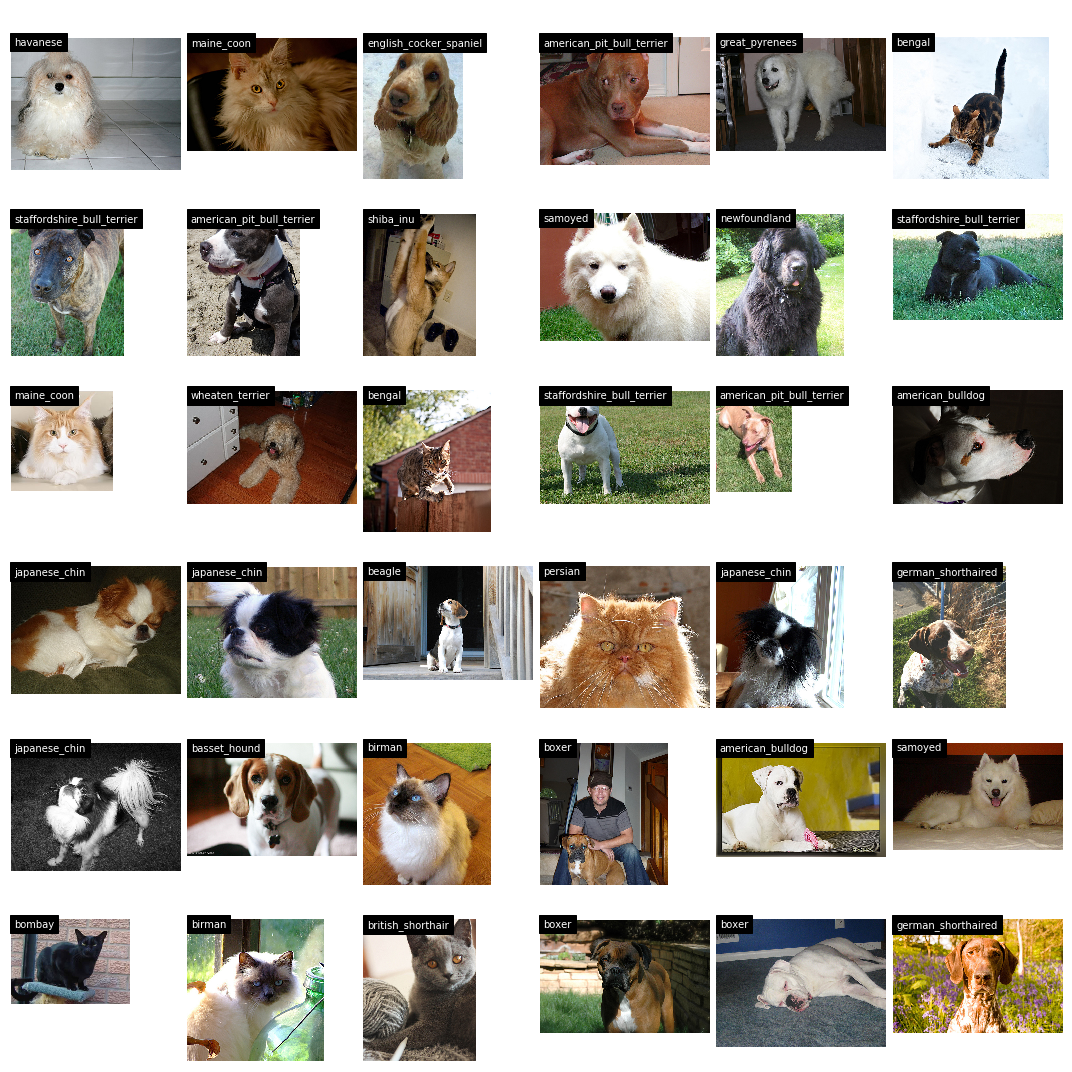

In [5]:
import os
import glob
import re
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def get_category(file):
    m = re.search("\d", file, re.IGNORECASE)
    if m:
        return file[:m.start() - 1].lower().split("/")[1]

def display_images(file_names, numOfImages = 6):
    indicies = random.sample(range(len(file_names)), numOfImages * numOfImages)
    train_images = [file_names[i] for i in indicies]
    
    fig, axes = plt.subplots(nrows=numOfImages,ncols=numOfImages, figsize=(15,15), sharex=True, sharey=True, frameon=False)
    for i,ax in enumerate(axes.flat):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        curr_i = train_images[i]
        imgplot = mpimg.imread(curr_i)
        ax.imshow(imgplot)
        ax.text(10,20,get_category(curr_i), fontdict={"backgroundcolor": "black","color": "white" })
        ax.axis('off')
    plt.tight_layout(h_pad=0, w_pad=0)    
    
    
display_images(glob.glob('breeds/*.jpg'))

print("Done.")

<br>

# Clean and Normalize the Data
Existing image recognition data-sets often include images of multiple dimensions, color mixed with black and white photos, maybe even line art plus photos. File names may follow multiple formats, and the subject matter within the images may be single, multiple, profile, straight-on face, back of head, surrounded by a complex background or more. 
Cleaning and normalizing the data means fixing the inconsistencies so that the machine processing can occur with minimal errors. Oftentimes data cleaning is tedious and requires significant time commitment. 
Data preprocessing techniques include:
1.	Data cleaning − Eliminates noise and resolves inconsistencies in the data. 
2.	Data integration − Migrates data from various different sources into one coherent source, such as a data warehouse.
3.	Data transformation – Standardizes or normalizes any form of data.
4.	Data reduction – Reduces the size of the data by aggregating it.

Another name for this effort is extract, transform, and load (ETL).
This project required the team to normalize the file dimensions, file names and create a data layout expected by the framework. 

It is common for the data cleanup tasks to be pared with framework and topology selection because different topologies expect different data layouts and formats. When experimenting with different topologies it might be necessary to have several copies of the data in various formats.  Multiple copies of data-sets can take up a lot of space, so ensure you’ve got lots of storage and processing capability.

![Clean and Normalize the Data](assets/part1_3.jpg)

## Activity
The code in the next cell performs some of the cleanup tasks. Review the code and notice that it is removing corrupt files, files with the wrong format, and files with incorrect metadata.

Click the cell below and then click **Run**.

In [6]:
import cv2

for file in glob.glob("breeds/*"):
    if not file.endswith(".jpg"):
        #Not ending in .jpg
        print("Deleting (.mat): " + file)
        os.remove(os.path.join(os.getcwd(), file))
    else: 
        flags = cv2.IMREAD_COLOR
        im = cv2.imread(file, flags)
        
        if im is None:
            #Can't read in image
            print("Deleting (None): " + file)
            os.remove(os.path.join(os.getcwd(), file))
            continue
        elif len(im.shape) != 3:
            #Wrong amount of channels
            print("Deleting (len != 3): " + file)
            os.remove(os.path.join(os.getcwd(), file))
            continue
        elif im.shape[2] != 3:
            #Wrong amount of channels
            print("Deleting (shape[2] != 3): " + file)
            os.remove(os.path.join(os.getcwd(), file))
            continue
            
        with open(os.path.join(os.getcwd(), file), 'rb') as f:
            check_chars = f.read()
        if check_chars[-2:] != b'\xff\xd9':
            #Wrong ending metadata for jpg standard
            print('Deleting (xd9): ' + file)
            os.remove(os.path.join(os.getcwd(), file))
        elif check_chars[:4] != b'\xff\xd8\xff\xe0':
            #Wrong Start Marker / JFIF Marker metadata for jpg standard
            print('Deleting (xd8/xe0): ' + file)
            os.remove(os.path.join(os.getcwd(), file))
        elif check_chars[6:10] != b'JFIF':
            #Wrong Identifier metadata for jpg standard
            print('Deleting (xd8/xe0): ' + file)
            os.remove(os.path.join(os.getcwd(), file))
        elif "beagle_116.jpg" in file or "chihuahua_121.jpg" in file:
            #Using EXIF Data to determine this
            print('Deleting (corrupt jpeg data): ', file)
            os.remove(os.path.join(os.getcwd(), file))  


print('Done.')

Deleting (.mat): breeds/Abyssinian_100.mat
Deleting (.mat): breeds/Abyssinian_101.mat
Deleting (.mat): breeds/Abyssinian_102.mat
Deleting (xd8/xe0): breeds/Abyssinian_170.jpg
Deleting (xd8/xe0): breeds/Abyssinian_180.jpg
Deleting (None): breeds/Abyssinian_34.jpg
Deleting (xd9): breeds/Abyssinian_5.jpg
Deleting (xd8/xe0): breeds/Abyssinian_67.jpg
Deleting (xd8/xe0): breeds/Bengal_146.jpg
Deleting (xd8/xe0): breeds/Bengal_195.jpg
Deleting (xd8/xe0): breeds/Bombay_160.jpg
Deleting (xd8/xe0): breeds/Bombay_19.jpg
Deleting (xd8/xe0): breeds/Bombay_29.jpg
Deleting (xd8/xe0): breeds/Bombay_88.jpg
Deleting (xd8/xe0): breeds/British_Shorthair_239.jpg
Deleting (xd9): breeds/Egyptian_Mau_138.jpg
Deleting (None): breeds/Egyptian_Mau_139.jpg
Deleting (xd9): breeds/Egyptian_Mau_14.jpg
Deleting (None): breeds/Egyptian_Mau_145.jpg
Deleting (xd9): breeds/Egyptian_Mau_156.jpg
Deleting (xd8/xe0): breeds/Egyptian_Mau_160.jpg
Deleting (xd8/xe0): breeds/Egyptian_Mau_162.jpg
Deleting (xd8/xe0): breeds/Egypti

# Augment Your Data

Most of the time you’re cleaning data and removing noise. Since our app needs to work with images of wet, muddy, or injured animals, or perhaps blurry images because the animal is running away in fear, we actually need to ADD noise to the data-set. 

We decided to add image noise by building a small program to flip, flop, blur, and extract color channels from the images in the dataset. These actions expanded our training data-set by 6x.

The cell below uses a parallel method to scale the image processing tasks to all available processors.

7351 out of 7352 processed
Done.


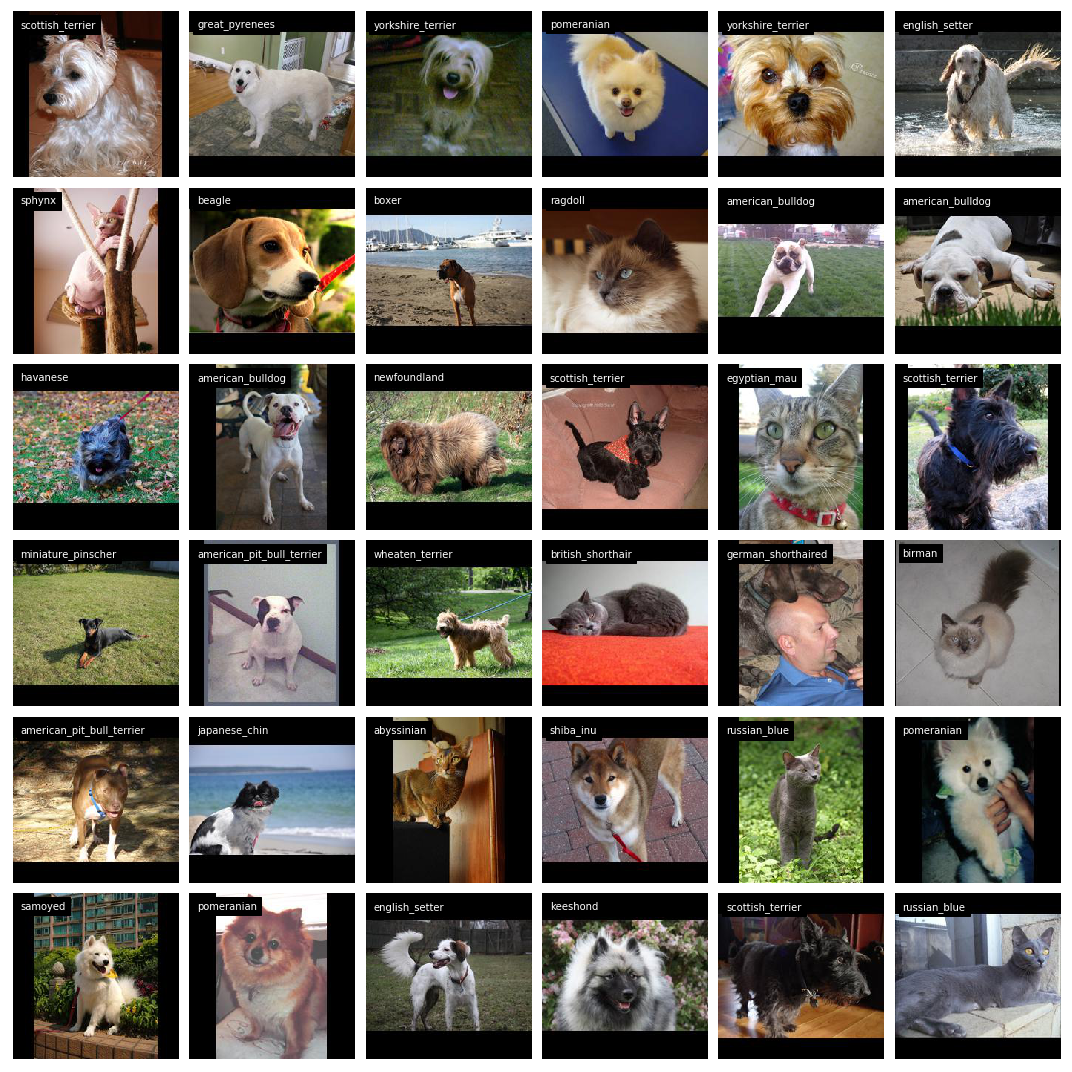

In [7]:
#%%bash

#echo "Start resizing to 227x227"
#parallel -j 200 convert {} -resize 227x227 -filter spline -unsharp 0x6+0.5+0 -background black -gravity center -extent 227x227  {} ::: *.jpg
#echo "Resizing done"

#mkdir flop
#echo "Start augmentation 1"
#parallel -j 200 convert {} -flop flop/{.}-flop.jpg ::: *.jpg
#echo "Finish augmetation 1"

#mkdir flip
#echo "Start augmentation 2"
#parallel -j 200 convert {} -transverse -rotate 90 flip/{.}-flip.jpg ::: *.jpg
#echo "Finish augmetation 2"

#mkdir blur
#echo "Start augmentation 3"
#parallel -j 200 convert {} -blur 0x1 blur/{.}-blur.jpg ::: *.jpg
#echo "Finish augmetation 3"

#mkdir red
#echo "Start augmentation 4"
#parallel -j 200 convert {} -channel R -separate red/{.}-red.jpg ::: *.jpg
#echo "Finish augmetation 4"

#mkdir blue
#echo "Start augmentation 5"
#parallel -j 200 convert {} -channel B -separate blue/{.}-blue.jpg ::: *.jpg
#echo "Finish augmetation 5"

#mkdir green
#echo "Start augmentation 6"
#parallel -j 200 convert {} -channel G -separate green/{.}-green.jpg ::: *.jpg
#echo "Finish augmetation 6"

#echo "Copying augmented data to main folder"
#cp flop/* flip/* blur/* red/* blue/* green/* .

#echo "Augmentation done"

from multiprocessing import Pool
from PIL import Image
import sys

def resize_image(file, size=224):
    black_background = Image.new('RGB', (size, size), "black")
    img = Image.open(file)
    img.thumbnail((size,size))
    x, y = img.size
    black_background.paste(img, (int((size - x) / 2), int((size - y) / 2)))
    black_background.save(file)
    return black_background
  
pool = Pool()
for i, _ in enumerate(pool.map(resize_image, glob.glob("breeds/*"))):
    if i % 10 == 0:
        sys.stdout.write('\r{0} out of {1} processed'.format(i+1, len(glob.glob("breeds/*"))))
        
sys.stdout.write('\n')
sys.stdout.flush()

display_images(glob.glob('breeds/*.jpg'))

print("Done.")

<br>
<br>
# Organize Data for Consumption by TensorFlow*

The framework you choose for your project determines how you need to organize your data. After extensive experimentation we selected TensorFlow for this project. This section describes how to organize your data layers.

We are splitting the images into training and validation sets, with 80 percent of the images targeted for training and 20 percent of the images targeted for validation.  Our data needs to be organized in a specific manner. That organization is to have each image in a folder that dictates which category it belongs to.  

We'll create a train and a validation folder.  Within those folders, we'll have directories with each category name and then the respective images within their category folder.

This next cell of code creates the data layout as expected.

![Organize Data for Consumption by Framework](assets/part1_4.jpg)

### Activity 
In the cell below, set the **train_ratio** to **0.8** and then click **Run**.

*Hint: We set the train_ratio = ? to a value between 0 and 1 to define our train and validation split*.

In [11]:
import os
import re
import errno
import math

def get_category(file):
    m = re.search("\d", file, re.IGNORECASE)
    if m:
        return file[:m.start() - 1].lower()

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

train_ratio = 0.8
        
file_names = os.listdir('breeds')
category_names = [ get_category(file) for file in file_names]
category_names = [ name for name in category_names if name is not None ]
category_names = sorted(list(set(category_names)))
for category in category_names:
    make_sure_path_exists("breeds/train/" + str(category))
    make_sure_path_exists("breeds/validation/" + str(category)) 

   
for idx, category in enumerate(category_names):
    category_list = []
    for file in file_names:
        if category.lower() in file.lower():
            category_list.append(file)
    
    category_list = sorted(category_list)
    split_ratio = math.floor(len(category_list) * train_ratio)
    train_list = category_list[:split_ratio]
    validation_list = category_list[split_ratio:]
    for i, file in enumerate(train_list):
        os.rename("breeds/" + file, "breeds/train/" + str(category) + "/" + file)
        if i % 10 == 0:
            sys.stdout.write('\r>> Moving train image %d to category folder %s' % (i+1, category))
            sys.stdout.flush()
        
    sys.stdout.write('\n')
    sys.stdout.flush()        
        
    for i, file in enumerate(validation_list):
        os.rename("breeds/" + file, "breeds/validation/" + str(category) + "/" + file)
        if i % 10 == 0:
            sys.stdout.write('\r>> Moving validation image %d to category folder %s' % (i+1, category))
            sys.stdout.flush()
                
    sys.stdout.write('\n')
    sys.stdout.flush()      

print("Done.")

Done.


<br>
<br>
 
# Confirm Folder Structure is Correct

We have a sorted folder, 37 breeds folders, and pictures of those breeds within their respective folders.

![Confirm Folder Structure is Correct](assets/part1_5.jpg)

### Activity 
Click the cell below and then click **Run**.

In [12]:
for root, dirs, files in os.walk("breeds"):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:5]:
        print('{0}{1}'.format('    ' * (level + 1), f))
print("Done.")

breeds/
    train/
        abyssinian/
            Abyssinian_1.jpg
            Abyssinian_10.jpg
            Abyssinian_100.jpg
            Abyssinian_101.jpg
            Abyssinian_102.jpg
        american_bulldog/
            american_bulldog_10.jpg
            american_bulldog_100.jpg
            american_bulldog_101.jpg
            american_bulldog_102.jpg
            american_bulldog_103.jpg
        american_pit_bull_terrier/
            american_pit_bull_terrier_1.jpg
            american_pit_bull_terrier_10.jpg
            american_pit_bull_terrier_100.jpg
            american_pit_bull_terrier_101.jpg
            american_pit_bull_terrier_102.jpg
        basset_hound/
            basset_hound_1.jpg
            basset_hound_10.jpg
            basset_hound_100.jpg
            basset_hound_101.jpg
            basset_hound_102.jpg
        beagle/
            beagle_1.jpg
            beagle_10.jpg
            beagle_100.jpg
            beagle_101.jpg
            beagle_102.jpg
     

# Optimize Data for Ingestion

### Data Input/Output
A TFRecords file represents a sequence of (binary) strings. The format is not random access, so it is suitable for streaming large amounts of data but not suitable if fast sharding or other non-sequential access is desired. See Data IO (Python Functions), https://www.tensorflow.org/api_guides/python/python_io#tfrecords_format_details

### Standard TensorFlow* Format
Another approach is to convert whatever data you have into a supported format. This approach makes it easier to mix and match data-sets and network architectures. The recommended format for TensorFlow is a TFRecords file containing tf.train.Example protocol buffers (which contain Features as a field). You write a little program that gets your data, stuffs it in an Example protocol buffer, serializes the protocol buffer to a string, and then writes the string to a TFRecords file using the tf.python_io.TFRecordWriter. See https://www.tensorflow.org/versions/r1.0/programmers_guide/reading_data#file_formats

![Optimize Data for Ingestion](assets/part1_6.jpg)

### Activity

When creating a TFRecord file you can split the dataset into shards.  This can be especially beneficial if you have a particularly large dataset and don't want to end up with a single 1+GB file.  

Below, we're creating shards of data based on the files into the number passed in **\_NUM\_SHARDS**.

In the cell below, set **\_NUM\_SHARDS** to a value between **1** and **5** and then click **Run**.

In [13]:
import tensorflow as tf

_NUM_SHARDS = 4
_SHARD_NAME = "breeds"
LABELS_FILENAME = 'labels.txt'

class ImageReader(object):
    def __init__(self):
        # Initializes function that decodes RGB JPEG data.
        self._decode_jpeg_data = tf.placeholder(dtype=tf.string)
        self._decode_jpeg = tf.image.decode_jpeg(self._decode_jpeg_data, channels=3)

    def read_image_dims(self, sess, image_data):
        image = self.decode_jpeg(sess, image_data)
        return image.shape[0], image.shape[1]

    def decode_jpeg(self, sess, image_data):
        image = sess.run(self._decode_jpeg,
                         feed_dict={self._decode_jpeg_data: image_data})
        assert len(image.shape) == 3
        assert image.shape[2] == 3
        return image

def int64_feature(values):
    if not isinstance(values, (tuple, list)):
        values = [values]
    return tf.train.Feature(int64_list=tf.train.Int64List(value=values))


def bytes_feature(values):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[values]))
    
def image_to_tfexample(image_data, image_format, height, width, class_id):
    return tf.train.Example(features=tf.train.Features(feature={
      'image/encoded': bytes_feature(image_data),
      'image/format': bytes_feature(image_format),
      'image/class/label': int64_feature(class_id),
      'image/height': int64_feature(height),
      'image/width': int64_feature(width),
    }))

def write_label_file(labels_to_class_names, dataset_dir,
                     filename=LABELS_FILENAME):
    labels_filename = os.path.join(dataset_dir, filename)
    with tf.gfile.Open(labels_filename, 'w') as f:
        for label in labels_to_class_names:
            class_name = labels_to_class_names[label]
            f.write('%d:%s\n' % (label, class_name))


def _get_filenames_and_classes(dataset_dir, sorted_dir):
    breeds_root = os.path.join(dataset_dir, sorted_dir)
    directories = []
    class_names = []
    for filename in os.listdir(breeds_root):
        path = os.path.join(breeds_root, filename)
        if os.path.isdir(path):
            directories.append(path)
            class_names.append(filename)

    photo_filenames = []
    for directory in directories:
        for filename in os.listdir(directory):
            path = os.path.join(directory, filename)
            photo_filenames.append(path)

    return photo_filenames, sorted(class_names)


def _get_dataset_filename(dataset_dir, split_name, shard_id):
    output_filename = _SHARD_NAME + '_%s_%05d-of-%05d.tfrecord' % (
      split_name, shard_id, _NUM_SHARDS)
    return os.path.join(dataset_dir, output_filename)


def _convert_dataset(split_name, filenames, class_names_to_ids, dataset_dir):
    assert split_name in ['train', 'validation']

    num_per_shard = int(math.ceil(len(filenames) / float(_NUM_SHARDS)))

    with tf.Graph().as_default():
        image_reader = ImageReader()

        with tf.Session('') as sess:

            for shard_id in range(_NUM_SHARDS):
                output_filename = _get_dataset_filename(
                    dataset_dir, split_name, shard_id)

                with tf.python_io.TFRecordWriter(output_filename) as tfrecord_writer:
                    start_ndx = shard_id * num_per_shard
                    end_ndx = min((shard_id+1) * num_per_shard, len(filenames))
                    for i in range(start_ndx, end_ndx):
                        sys.stdout.write('\r>> Converting image %d/%d shard %d' % (
                            i+1, len(filenames), shard_id))
                        sys.stdout.flush()

                        # Read the filename:
                        image_data = tf.gfile.FastGFile(filenames[i], 'rb').read()
                        height, width = image_reader.read_image_dims(sess, image_data)

                        class_name = os.path.basename(os.path.dirname(filenames[i]))
                        class_id = class_names_to_ids[class_name]

                        example = image_to_tfexample(
                            image_data, b'jpg', height, width, class_id)
                        tfrecord_writer.write(example.SerializeToString())

    sys.stdout.write('\n')
    sys.stdout.flush()


def _dataset_exists(dataset_dir):
    for split_name in ['train', 'validation']:
        for shard_id in range(_NUM_SHARDS):
            output_filename = _get_dataset_filename(
              dataset_dir, split_name, shard_id)
            if not tf.gfile.Exists(output_filename):
                return False
    return True

print("Done.")

Done.


### Activity
TensorFlow requires separate data sets for training and validation and that the data be stored in two separate records. Why separate image sets for training and validation? To prevent *overfitting*, which occurs when you train and test on the same images. You train on a set, then test on a new/different set to validate that the machine is truly learning to recognize the images. 

Our records will contain the words **train** and **validation** in their path to distinguish between the two. We used the industry standard ratio of 80 percent train and 20 percent test/validation to split the data-set.

In the cell below, set the two function calls to **\_convert\_dataset\_** first parameter to **"train"** and **"validation"** and then click **Run**.

*Hint: Look at the filenames being passed into the **\_convert\_dataset\_** function and make sure you are matching that with the correct label you are replacing into the **?????**.*

In [15]:
import random

def run(dataset_dir):
    if not tf.gfile.Exists(dataset_dir):
        tf.gfile.MakeDirs(dataset_dir)

    if _dataset_exists(dataset_dir):
        print('Dataset files already exist. Exiting without re-creating them.')
        return

    train_photo_filenames, class_names = _get_filenames_and_classes(dataset_dir, "train")
    validation_photo_filenames, class_names = _get_filenames_and_classes(dataset_dir, "validation")
    class_names_to_ids = dict(zip(class_names, range(len(class_names))))
    
    # First, convert the training and validation sets.
    _convert_dataset("train", train_photo_filenames, class_names_to_ids,
                   dataset_dir)
    _convert_dataset("validation", validation_photo_filenames, class_names_to_ids,
                   dataset_dir)

    # Finally, write the labels file:
    labels_to_class_names = dict(zip(range(len(class_names)), class_names))
    write_label_file(labels_to_class_names, dataset_dir)

    print('\nFinished converting the Breeds dataset!')

run('breeds')

>> Converting image 7352/7352 shard 3


Finished converting the Breeds dataset!


<br>

### After All of This Data Wrangling We Can Actually Begin the Training Process

When we started this project, we always had an edge device in mind as our ultimate deployment platform. To that end we always considered three things when selecting our topology or network: time to train, size, and inference speed. 

**Time to Train:** Depending on the number of layers and computation required, a network can take a significantly shorter or longer time to train. Computation time and programmer time are costly resources, so we wanted short training times.  

**Size:** Since we're targeting an edge device and a an Intel® Movidius™ Neural Compute Stick stick we must consider the size of the network that is allowed in memory as well as supported networks.

**Inference Speed:** Typically the deeper and larger the network, the slower the inference speed. In our use case we are working with a live video stream; we want at least 10 frames per second on inference.

At this point we're going to continue with the TensorFlow framework plus the GoogLeNet Inception* v1 topology/network since we're currently working on a simpler dataset.


![GoogLeNet](assets/googlenet.png)

# Part 2: Training CatVsDog with TensorFlow and GoogLeNet Inception* v1 on CPU

# Objective 
Understand the stages of preparing for training using the TensorFlow framework and an GoogLeNet Inception v1 topology. You will initiate training and view a completed graph, and learn about the relationship between accuracy and loss.

# Activities 
**In this section of the training you will**
- Download pretrained model
- Clone TensorFlow/models Github* repo
- Modify/add files within repo to add our dataset
- Initiate training and review live training logs

### Pretrained Models
"Neural nets work best when they have many parameters, making them powerful function approximators. However, this means they must be trained on very large datasets. Because training models from scratch can be a very computationally intensive process requiring days or even weeks, we are using a pre-trained models provided by Google. This CNNs have been trained on the ILSVRC-2012-CLS image classification dataset." From https://github.com/tensorflow/models/tree/master/research/slim#pre-trained-models.

![Download pre-trained model](assets/part2_1.jpg)

### Activity
Click the cell below and then click **Run**.

In [16]:
!wget http://download.tensorflow.org/models/inception_v1_2016_08_28.tar.gz
!tar xf inception_v1_2016_08_28.tar.gz
!rm -rf checkpoints
!mkdir checkpoints
!mv inception_v1.ckpt checkpoints
!rm inception_v1_2016_08_28.tar.gz
!echo "Done."

--2018-07-09 06:33:18--  http://download.tensorflow.org/models/inception_v1_2016_08_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.136.128, 2607:f8b0:4002:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.136.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24642554 (24M) [application/x-tar]
Saving to: ‘inception_v1_2016_08_28.tar.gz’

100%[======================================>] 24,642,554  6.18MB/s   in 3.8s   

2018-07-09 06:33:22 (6.18 MB/s) - ‘inception_v1_2016_08_28.tar.gz’ saved [24642554/24642554]

Done.


### TensorFlow/Models

The TensorFlow team provides nice wrappers around a lot of functionality that needs to be done when training using TensorFlow.  Below, we're going to pull in one of these repos directly so that we have access to those wrappers.

![Clone TensorFlow Models Repo](assets/part2_2.jpg)

### Activity
Click the cell below and then click **Run**.

In [17]:
!git clone --depth 1 https://github.com/tensorflow/models
!echo "Done."    

Cloning into 'models'...
remote: Counting objects: 2807, done.
remote: Compressing objects: 100% (2356/2356), done.
remote: Total 2807 (delta 542), reused 1682 (delta 382), pack-reused 0
Receiving objects: 100% (2807/2807), 371.20 MiB | 350.00 KiB/s, done.
Resolving deltas: 100% (542/542), done.
Checking out files: 100% (2920/2920), done.
Done.


### Adding to the Slim Datasets

To use the wrappers we're going to have to modify and add some existing code to the repo.  Below we're overwriting the **dataset_factory.py** file with a slightly modified version that knows about our breeds dataset and an additional Python* import statement.  We're also copying over **breeds.py** since this contains information specific to our dataset that will be utilized by the **dataset_factory**.

![Modify Repo Scripts](assets/part2_3.jpg)

### Activity
Click the cell below and then click **Run**.

In [18]:
!cp breeds.py models/research/slim/datasets/breeds.py
!cp dataset_factory_modified.py models/research/slim/datasets/dataset_factory.py
!cp train_image_classifier_modified.py models/research/slim/train_image_classifier.py
!echo "Done."

Done.


# Start Training

Let’s start training with TensorFlow.

CPUs, which includes Intel® Xeon Phi™ processors, achieve optimal performance when TensorFlow is built from source with all of the instructions supported by the target CPU.

Beyond using the latest instruction sets, Intel has added support for the Intel® Math Kernel Library for Deep Neural Networks (Intel® MKL-DNN) to TensorFlow. While the name is not completely accurate, these optimizations are often simply referred to as MKL or *TensorFlow with MKL*. TensorFlow with Intel MKL-DNN contains details on the Intel® MKL optimizations.

The two configurations listed below are used to optimize CPU performance by adjusting the thread pools.

- **intra_op_parallelism_threads**: Nodes that can use multiple threads to parallelize their execution will schedule the individual pieces into this pool.
- **inter_op_parallelism_threads**: All ready nodes are scheduled in this pool.

These configurations are set via the tf.ConfigProto and passed to tf.Session in the config attribute as shown in the snippet below. For both configuration options, if they are unset or set to zero, will default to the number of logical CPU cores. Testing has shown that the default is effective for systems ranging from one CPU with 4 cores to multiple CPUs with 70+ combined logical cores. A common alternative optimization is to set the number of threads in both pools equal to the number of physical cores rather than logical cores.

Intel MKL uses the following environment variables to tune performance:

**KMP_BLOCKTIME** - Sets the time, in milliseconds, that a thread should wait, after completing the execution of a parallel region, before sleeping.

**KMP_AFFINITY** - Enables the runtime library to bind threads to physical processing units.

**KMP_SETTINGS** - Enables (true) or disables (false) the printing of OpenMP* runtime library environment variables during program execution.

**OMP_NUM_THREADS** - Specifies the number of threads to use.

See *Optimizing for CPU*, https://www.tensorflow.org/performance/performance_guide#optimizing_for_cpu.

**Best Settings for Intel® Xeon Processor - 5th Generation  (2 Socket -- 44 Cores)**
![Tensorflow Optimization](assets/tf_optimize.png)

![Optimize Performance for CPU](assets/part2_4.jpg)

### Activity
In the cell below, update **OMP_NUM_THREADS** to **"12"**, **KMP_BLOCKTIME** to **"1"**, and then click **Run**.

In [20]:
import os
import tensorflow as tf

os.environ["KMP_BLOCKTIME"] = "1"
os.environ["KMP_AFFINITY"] = "granularity=fine,compact,1,0"
os.environ["KMP_SETTINGS"] = "1"
os.environ["OMP_NUM_THREADS"] = "12"
print("Done.")

Done.


### Fine-Tuning a Model from an Existing Checkpoint

"Rather than training from scratch, we'll often want to start from a pre-trained model and fine-tune it. To indicate a checkpoint from which to fine-tune, we'll call training with the --checkpoint_path flag and assign it an absolute path to a checkpoint file.

When fine-tuning a model, we need to be careful about restoring checkpoint weights. In particular, when we fine-tune a model on a new task with a different number of output labels, we wont be able restore the final logits (classifier) layer. For this, we'll use the --checkpoint_exclude_scopes flag. This flag hinders certain variables from being loaded. When fine-tuning on a classification task using a different number of classes than the trained model, the new model will have a final 'logits' layer whose dimensions differ from the pre-trained model. For example, if fine-tuning an ImageNet-trained model on Flowers, the pre-trained logits layer will have dimensions [2048 x 1001] but our new logits layer will have dimensions [2048 x 5]. Consequently, this flag indicates to TF-Slim to avoid loading these weights from the checkpoint.

Keep in mind that warm-starting from a checkpoint affects the model's weights only during the initialization of the model. Once a model has started training, a new checkpoint will be created in --train_dir. If the fine-tuning training is stopped and restarted, this new checkpoint will be the one from which weights are restored and not the --checkpoint_path. Consequently, the flags --checkpoint_path and --checkpoint_exclude_scopes are only used during the 0-th global step (model initialization). Typically for fine-tuning one only want train a sub-set of layers, so the flag --trainable_scopes allows to specify which subsets of layers should trained, the rest would remain frozen." See https://github.com/tensorflow/models/tree/master/research/slim#fine-tuning-a-model-from-an-existing-checkpoint.

![Fine-Tune a Model](assets/part2_5.jpg)

### Activity
In the cell below, update the **max_number_of_steps** parameter to a number between **500** and **1500**, the **intra_op** parameter to the number **12** and then click **Run**.

In [22]:
!rm -rf train_dir
!mkdir train_dir

!python models/research/slim/train_image_classifier.py \
    --train_dir=train_dir \
    --dataset_name=breeds \
    --dataset_split_name=train \
    --clone_on_cpu=true \
    --dataset_dir=breeds \
    --model_name=inception_v1 \
    --checkpoint_path=checkpoints/inception_v1.ckpt \
    --checkpoint_exclude_scopes=InceptionV1/Logits \
    --trainable_scopes=InceptionV1/Logits \
    --max_number_of_steps=1500 \
    --learning_rate=0.01 \
    --batch_size=32 \
    --save_interval_secs=60 \
    --save_summaries_secs=60 \
    --inter_op=2 \
    --intra_op=12

!echo "Done."

/glob/intel-python/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please switch to tf.train.create_global_step
Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Fine-tuning from checkpoints/inception_v1.ckpt
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
20

INFO:tensorflow:global step 470: loss = 1.2334 (0.297 sec/step)
INFO:tensorflow:global step 480: loss = 0.8921 (0.304 sec/step)
INFO:tensorflow:global step 490: loss = 1.6886 (0.300 sec/step)
INFO:tensorflow:global step 500: loss = 0.8469 (0.301 sec/step)
INFO:tensorflow:global step 510: loss = 1.0904 (0.301 sec/step)
INFO:tensorflow:global step 520: loss = 0.9307 (0.297 sec/step)
INFO:tensorflow:global step 530: loss = 1.3448 (0.296 sec/step)
INFO:tensorflow:global step 540: loss = 1.3127 (0.301 sec/step)
INFO:tensorflow:Saving checkpoint to path train_dir/model.ckpt
INFO:tensorflow:global step 550: loss = 1.0251 (0.771 sec/step)
INFO:tensorflow:global_step/sec: 3.13766
INFO:tensorflow:Recording summary at step 558.
INFO:tensorflow:global step 560: loss = 1.1118 (0.302 sec/step)
INFO:tensorflow:global step 570: loss = 1.8903 (0.301 sec/step)
INFO:tensorflow:global step 580: loss = 0.8608 (0.304 sec/step)
INFO:tensorflow:global step 590: loss = 0.9806 (0.300 sec/step)
INFO:tensorflow:g

# Part 3: Evaluate, Freeze and Test Your Training Results

### Evaluate Your Latest Training Checkpoint

Earlier we created a TFRecord file with our validation images.  Below, we'll be using our validation set to determine our accuracy by running the eval_image_classifier script.  It will give us the Accuracy and Recall for Top 5.

![Evaluate Your Checkpoint](assets/part3_1.jpg)

### Activity
Click the cell below and then click **Run**.

In [ ]:
!rm -rf eval_dir
!mkdir eval_dir
!python models/research/slim/eval_image_classifier.py \
    --checkpoint_path=$(ls -t train_dir/model.ckpt* | head -1 | rev | cut -d '.' -f2- | rev) \
    --eval_dir=eval_dir \
    --dataset_dir=breeds \
    --dataset_name=breeds \
    --dataset_split_name=validation \
    --model_name=inception_v1

!echo "Done."    

### Export Your Inference Graph of Inception v1

We want to export our inference graph of Inception v1 so we can use it later to create a frozen graph (.pb) file.  Below, we'll run the export_inference_graph script that will take the inceptionv1 model and our dataset to create a .pb file.  Passing in our dataset is important since it will make sure to create a final layer of 37 categories rather than the 1000 from ImageNet.

![Export Inference Graph](assets/part3_2.jpg)

### Activity
Click the cell below and then click **Run**.

In [ ]:
!python models/research/slim/export_inference_graph.py \
    --alsologtostderr \
    --model_name=inception_v1 \
    --image_size=224 \
    --batch_size=1 \
    --output_file=train_dir/inception_v1_inf_graph.pb \
    --dataset_name=breeds
    
!echo "Done."    

### Clone the Main TensorfFow Repo

We're cloning the main TensorFlow/TensorFlow repository since it contains the script to create a frozen graph.

![Clone TensorFlow Repo](assets/part3_3.jpg)

### Activity
Click the cell below and then click **Run**.

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/tensorflow.git
    
!echo "Done."    

### Freeze Your Graph

Freezing your graph will take the inference graph definition we created above and the latest checkpoint file that was created during training.  It will merge these two into a single file for a convenient way to have the graph definition and weights for deployment.

![Freeze Your Graph](assets/part3_4.jpg)

### Activity
Click the cell below and then click **Run**.

In [ ]:
!python tensorflow/tensorflow/python/tools/freeze_graph.py \
    --clear_devices=true \
    --input_graph=train_dir/inception_v1_inf_graph.pb \
    --input_checkpoint=$(ls -t train_dir/model.ckpt* | head -1 | rev | cut -d '.' -f2- | rev) \
    --input_binary=true \
    --output_graph=train_dir/frozen_inception_v1.pb \
    --output_node_names=InceptionV1/Logits/Predictions/Reshape_1
    
!echo "Done."    

### Look at a Sample Image

We're going to use this image to run through the network and see the results.

![Display a Sample Image](assets/part3_5.jpg)

### Activity
Click the cell below and then click **Run**.

In [ ]:
from PIL import Image

Image.open('breeds/train/maine_coon/Maine_Coon_100.jpg')

### Inference on an Image

We can use the newly created frozen graph file to test a sample image.  We're using the label_image script that takes an image, frozen graph, labels.txt files, and displays the top five probabilities for the given image.

![Inference on Image](assets/part3_6.jpg)

### Activity
Click the cell below and then click **Run**.

In [ ]:
!python tensorflow/tensorflow/examples/label_image/label_image.py \
    --image=breeds/train/maine_coon/Maine_Coon_100.jpg \
    --input_layer=input \
    --input_height=224 \
    --input_width=224 \
    --output_layer=InceptionV1/Logits/Predictions/Reshape_1 \
    --graph=train_dir/frozen_inception_v1.pb \
    --labels=breeds/labels.txt
    
print("Done.")    

### Summary

- Getting your dataset
- Sorting your dataset
- Generating TFRecord files
- Learning about fine-tuning and checkpoints
- Train your dataset with fine-tune checkpoint
- Evaluating your training
- Creating a frozen graph
- Using a frozen graph to test image classification

# Part 4: Additional Fine Tuning (Optional)

### Fine Tuning the Entire Network

We previously fine tuned only the final layer of the network.  Now we're going to allow for all of the layers in the network to be trained but we're going to use a much lower learning rate.  This will let the network narrow in and tune the remaining weights we didn't tune from the ImageNet checkpoint.  We'll want to make sure not to train too much though, or we might start to overfit, so we'll limit the steps to about 500-1500.

### Activity
In the cell below, update the **max_number_of_steps** parameter to a number between **500** and **1500**, the **learning_rate** to **0.0001** and then click **Run**.

In [ ]:
!python models/research/slim/train_image_classifier.py \
    --train_dir=train_dir/all \
    --dataset_name=breeds \
    --dataset_split_name=train \
    --clone_on_cpu=true \
    --dataset_dir=breeds \
    --model_name=inception_v1 \
    --checkpoint_path=train_dir \
    --max_number_of_steps=???? \
    --learning_rate=???? \
    --learning_rate_decay_type=fixed \
    --batch_size=32 \
    --save_interval_secs=60 \
    --save_summaries_secs=60 \
    --inter_op=2 \
    --intra_op=12

!echo "Done."

### Activity
Click the cell below and then click **Run**.

In [ ]:
!python models/research/slim/eval_image_classifier.py \
    --checkpoint_path=$(ls -t train_dir/all/model.ckpt* | head -1 | rev | cut -d '.' -f2- | rev) \
    --eval_dir=eval_dir/all \
    --dataset_dir=breeds \
    --dataset_name=breeds \
    --dataset_split_name=validation \
    --model_name=inception_v1

!echo "Done."    

### Activity
Click the cell below and then click **Run**.

In [ ]:
!python tensorflow/tensorflow/python/tools/freeze_graph.py \
    --clear_devices=true \
    --input_graph=train_dir/inception_v1_inf_graph.pb \
    --input_checkpoint=$(ls -t train_dir/all/model.ckpt* | head -1 | rev | cut -d '.' -f2- | rev) \
    --input_binary=true \
    --output_graph=train_dir/all/frozen_inception_v1.pb \
    --output_node_names=InceptionV1/Logits/Predictions/Reshape_1
    
!echo "Done."    

### Activity
Click the cell below and then click **Run**.

In [ ]:
from PIL import Image

Image.open('breeds/train/maine_coon/Maine_Coon_100.jpg')

### Activity
Click the cell below and then click **Run**.

In [ ]:
!python tensorflow/tensorflow/examples/label_image/label_image.py \
    --image=breeds/train/maine_coon/Maine_Coon_100.jpg \
    --input_layer=input \
    --input_height=224 \
    --input_width=224 \
    --output_layer=InceptionV1/Logits/Predictions/Reshape_1 \
    --graph=train_dir/all/frozen_inception_v1.pb \
    --labels=breeds/labels.txt
    
print("Done.")    

### Resources

TensorFlow* Optimizations on Modern Intel® Architecture, https://software.intel.com/en-us/articles/tensorflow-optimizations-on-modern-intel-architecture

Intel Optimized TensorFlow Wheel Now Available, https://software.intel.com/en-us/articles/intel-optimized-tensorflow-wheel-now-available

Build and Install TensorFlow* on Intel® Architecture, https://software.intel.com/en-us/articles/build-and-install-tensorflow-on-intel-architecture

TensorFlow, https://www.tensorflow.org/


### Case Studies

Manufacturing Package Fault Detection Using Deep Learning, https://software.intel.com/en-us/articles/manufacturing-package-fault-detection-using-deep-learning

Automatic Defect Inspection Using Deep Learning for Solar Farm, https://software.intel.com/en-us/articles/automatic-defect-inspection-using-deep-learning-for-solar-farm


**Notices**

No license (express or implied, by estoppel or otherwise) to any intellectual property rights is granted by this document.

Intel disclaims all express and implied warranties, including without limitation, the implied warranties of merchantability, fitness for a particular purpose, and non-infringement, as well as any warranty arising from course of performance, course of dealing, or usage in trade.

This document contains information on products, services and/or processes in development. All information provided here is subject to change without notice. Contact your Intel representative to obtain the latest forecast, schedule, specifications and roadmaps.

The products and services described may contain defects or errors known as errata which may cause deviations from published specifications. Current characterized errata are available on request.

Copies of documents which have an order number and are referenced in this document may be obtained by calling 1-800-548-4725 or by visiting www.intel.com/design/literature.htm.

This sample source code is released under the Intel Sample Source Code License Agreement.

Intel, the Intel logo, Intel Xeon Phi, Movidius, and Xeon are trademarks of Intel Corporation in the U.S. and/or other countries. 

*Other names and brands may be claimed as the property of others.

© 2018 Intel Corporation